In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
from scipy import stats
from scipy.spatial import ConvexHull
from highlight_text import fig_text
from mplsoccer import PyPizza, FontManager
import math
from collections import Counter
from mplsoccer import Pitch, VerticalPitch
import scipy.stats as sps

In [2]:
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [55]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"

In [56]:
def parse_data(competition_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [m['match_id'] for m in matches]
    matches = [m for m in matches] 
    i = 0
    df = pd.DataFrame()
    for match_id in tqdm(match_ids):
        events = []
        for e in requests.get(url=match_url.format(match_id)).json():
            events.append(e)
        df = df.append(pd.json_normalize(events, sep='_').assign(match_id = match_id))
    return df, pd.json_normalize(matches, sep='_')

In [57]:
competition_id = 43
season_id = 3
df, df_matches = parse_data(competition_id, season_id)

100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [01:28<00:00,  1.39s/it]


In [58]:
df

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,pass_technique_name,shot_redirect,bad_behaviour_card_id,bad_behaviour_card_name,miscontrol_aerial_won,block_save_block,shot_open_goal,foul_committed_penalty,foul_won_penalty,shot_follows_dribble
0,52dd86ff-3645-45d2-b7e5-4352d9c94cf7,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3957a62c-bd93-4d60-b8a0-50fcb4cc86de,2,1,00:00:00.000,0,0,1,0.000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8ced4d0a-8081-4626-8a02-71294523be94,3,1,00:00:00.000,0,0,1,NaN,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ecda0f67-65e3-49a0-91f1-70de83943653,4,1,00:00:00.000,0,0,1,9.975,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54ac19ea-7c2f-479f-af94-0696b04e870d,5,1,00:00:00.507,0,0,2,1.920,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,813ff773-0e7e-4a11-b934-282e3d18b2e0,3828,2,00:49:06.053,94,6,168,NaN,23,Goal Keeper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3828,b869c659-e6bf-421c-b8af-45fba5ca88d1,3829,2,00:50:28.920,95,28,169,0.933,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3829,8addeb40-694a-4d34-9769-bad47c946da8,3830,2,00:50:29.853,95,29,169,NaN,42,Ball Receipt*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3830,c28f8635-3288-4c21-aec7-73ea6a94d327,3831,2,00:50:33.160,95,33,169,NaN,34,Half End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
sum(df.isna().sum()==227886)

0

In [60]:
df_players = df.drop_duplicates(subset = ['player_name', 'team_name'])[['player_name', 'team_name']].dropna()

In [61]:
df_players.query('team_name == "France"')
#https://www.youtube.com/watch?v=UfuWvgaAjQQ

,player_name,team_name
4,Antoine Griezmann,France
5,Raphaël Varane,France
7,Olivier Giroud,France
11,Benjamin Pavard,France
15,Samuel Yves Umtiti,France
29,N''Golo Kanté,France
51,Kylian Mbappé Lottin,France
62,Paul Pogba,France
65,Lucas Hernández Pi,France
74,Blaise Matuidi,France


In [62]:
location_columns = [x for x in df.columns.values if 'location' in x]
for col in location_columns:
    for i, dimension in enumerate(["x", "y"]):
        new_col = col.replace("location", dimension)
        df[new_col] = df.apply(lambda x: x[col][i] if type(x[col]) == list else None, axis=1)

In [63]:
df = df[[c for c in df.columns if c not in location_columns]]

In [64]:
df.columns.values

array(['id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'duration', 'type_id', 'type_name',
       'possession_team_id', 'possession_team_name', 'play_pattern_id',
       'play_pattern_name', 'team_id', 'team_name', 'tactics_formation',
       'tactics_lineup', 'related_events', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle',
       'pass_height_id', 'pass_height_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_type_id', 'pass_type_name',
       'pass_outcome_id', 'pass_outcome_name', 'ball_receipt_outcome_id',
       'ball_receipt_outcome_name', 'ball_recovery_recovery_failure',
       'under_pressure', 'interception_outcome_id',
       'interception_outcome_name', 'counterpress', 'duel_outcome_id',
       'duel_outcome_name', 'duel_type_id', 'duel_type_name',
       'dribble_outcome_id', 'dribble_outcome_name', 'pass_switch',
       'pass_aer

In [65]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

id                          object
index                        int64
period                       int64
timestamp           datetime64[ns]
minute                       int64
                         ...      
carry_end_y                float64
shot_end_x                 float64
shot_end_y                 float64
goalkeeper_end_x           float64
goalkeeper_end_y           float64
Length: 127, dtype: object

# 1. Вначале исследуем данные

In [66]:
actions = df.groupby(by=['player_name']).size().reset_index(name='num_of_actions')
df = df.merge(actions, on='player_name', how='left')
needless_players = actions[actions['num_of_actions']<55]['player_name']
df3 = df.copy()
df = df.loc[~df['player_name'].isin(needless_players)]
df

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,y,pass_end_x,pass_end_y,carry_end_x,carry_end_y,shot_end_x,shot_end_y,goalkeeper_end_x,goalkeeper_end_y,num_of_actions
0,52dd86ff-3645-45d2-b7e5-4352d9c94cf7,1,1,2021-12-05 00:00:00.000,0,0,1,0.000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3957a62c-bd93-4d60-b8a0-50fcb4cc86de,2,1,2021-12-05 00:00:00.000,0,0,1,0.000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8ced4d0a-8081-4626-8a02-71294523be94,3,1,2021-12-05 00:00:00.000,0,0,1,NaN,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ecda0f67-65e3-49a0-91f1-70de83943653,4,1,2021-12-05 00:00:00.000,0,0,1,9.975,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54ac19ea-7c2f-479f-af94-0696b04e870d,5,1,2021-12-05 00:00:00.507,0,0,2,1.920,30,Pass,...,41.0,31.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227880,f716b964-5b80-4866-b448-c81985baa6a1,3827,2,2021-12-05 00:49:05.160,94,5,168,0.893,16,Shot,...,53.0,NaN,NaN,NaN,NaN,120.0,36.4,NaN,NaN,697.0
227882,b869c659-e6bf-421c-b8af-45fba5ca88d1,3829,2,2021-12-05 00:50:28.920,95,28,169,0.933,30,Pass,...,41.0,50.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,263.0
227883,8addeb40-694a-4d34-9769-bad47c946da8,3830,2,2021-12-05 00:50:29.853,95,29,169,NaN,42,Ball Receipt*,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,448.0
227884,c28f8635-3288-4c21-aec7-73ea6a94d327,3831,2,2021-12-05 00:50:33.160,95,33,169,NaN,34,Half End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
player = 'Olivier Giroud'
df1 = df[df['player_name']==player]
df1.type_name.unique()

array(['Ball Receipt*', 'Pass', 'Pressure', 'Dribbled Past', 'Carry',
       'Miscontrol', 'Dribble', 'Clearance', 'Duel', 'Dispossessed',
       'Shot', 'Foul Committed', 'Ball Recovery', 'Block', 'Foul Won',
       'Bad Behaviour', 'Interception', 'Substitution', 'Player Off',
       'Player On'], dtype=object)

In [85]:
def pass_quantile(df,player_name):
    df_passes = df[df['type_name'] == 'Pass'].groupby(by=['player_name']).size().reset_index(name='num_of_passes')
    players = df.drop_duplicates(subset = ['player_name', 'team_name'])[['player_name', 'team_name']].dropna()
    passes = players.merge(df_passes, on='player_name', how='left').fillna(0)
    dis = sps.rv_discrete(name='dis',values=(passes['num_of_passes'],[1/len(passes['num_of_passes'])]*len(passes['num_of_passes'])))
    return dis.cdf(passes[passes['player_name'] == player_name]['num_of_passes'].iloc[0])

In [86]:
pass_quantile(df,player)

0.6924493554327793

In [89]:
def percent_of_games_played(df,player_name):
    df1 = df[df['player_name']==player_name]
    matches_played = len(df1['match_id'].unique())
    matches_of_the_team = len(df[df['team_name']==df1['team_name'].unique()[0]]['match_id'].unique())
    return 100*matches_played/matches_of_the_team

In [90]:
percent_of_games_played(df,player)

100.0

In [91]:
df1.groupby(by=['type_name']).size().reset_index(name='num_of_actions')

,type_name,num_of_actions
0,Bad Behaviour,1
1,Ball Receipt*,259
2,Ball Recovery,11
3,Block,5
4,Carry,105
5,Clearance,8
6,Dispossessed,8
7,Dribble,5
8,Dribbled Past,7
9,Duel,14


In [102]:
def player_actions_barplot(df,player_name):
    df1 = df[df['player_name']==player_name]
    actions = df1.groupby(by=['type_name']).size().reset_index(name='num_of_actions')
    plt.figure(figsize=(15,15))
    plt.title('Number of actions of '+player_name, fontsize=16)
    sns.barplot(actions['type_name'], actions['num_of_actions'])
    plt.ylabel('Number of actions', fontsize=16)
    plt.xlabel('')
    plt.xticks(rotation=90, fontsize=12)
    plt.show()

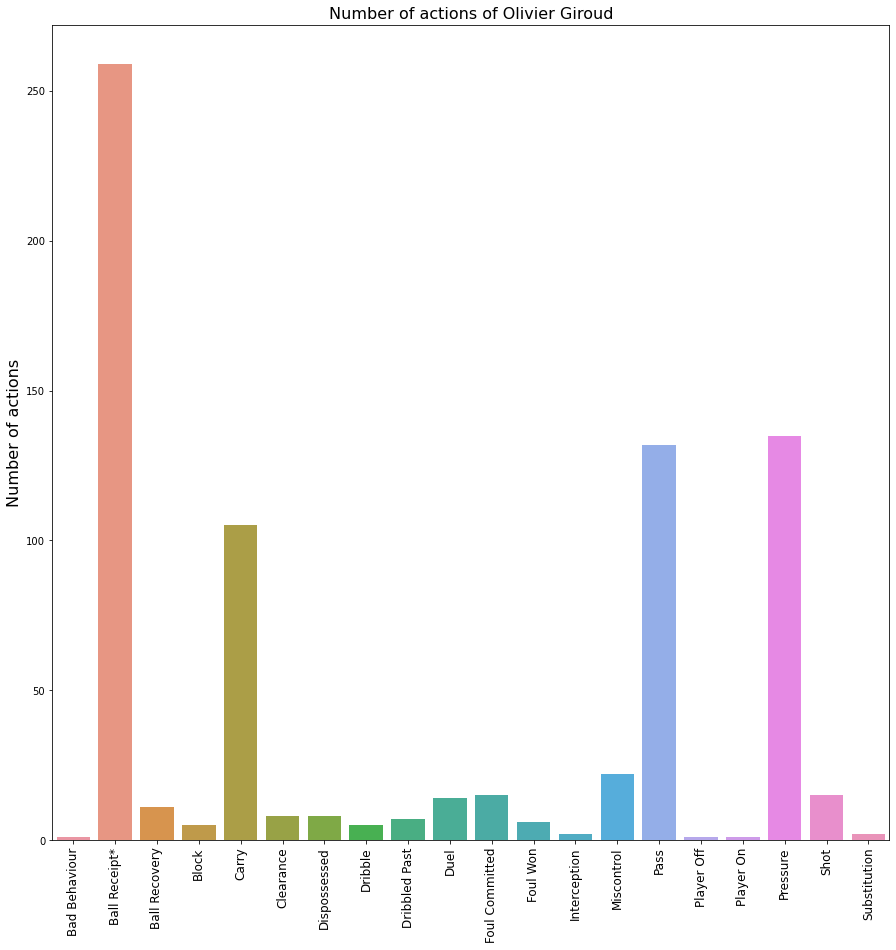

In [103]:
player_actions_barplot(df,player)

In [104]:
def time_on_the_field(df,player_name):
    df1 = df[df['player_name']==player_name]
    mins = 0
    secs = 0
    for mat_id in df1['match_id'].unique():
        pl_on = df1[(df1['type_name']=='Player On') & (df1['match_id']==mat_id)]
        if len(pl_on.index)!=0:
            for i in range(len(pl_on.index)):
                mins = mins - pl_on['minute'].iloc[i]
                secs = secs - pl_on['second'].iloc[i]
        
        pl_off = df1[(df1['type_name']=='Player Off') & (df1['match_id']==mat_id)]
        if len(pl_off.index)!=0:
            for i in range(len(pl_off.index)):
                mins = mins + pl_off['minute'].iloc[i]
                secs = secs + pl_off['second'].iloc[i]
        
        sub_in = df[(df['substitution_replacement_id']==df1['player_id'].unique()[0]) & (df['match_id']==mat_id)]
        sub_off = df1[(df1['type_name']=='Substitution') & (df1['match_id']==mat_id)]            
                
        half_ends = df[(df['type_name']=='Half End')&(df['team_name']==df1['team_name'].unique()[0])&(df['match_id']==mat_id)]
        
        half_time_1_min = half_ends[df['period']==1]['minute'].iloc[0]
        half_time_1_sec = half_ends[df['period']==1]['second'].iloc[0]
        half_time_2_min = half_ends[df['period']==2]['minute'].iloc[0]-45
        half_time_2_sec = half_ends[df['period']==2]['second'].iloc[0]
        added_to_1_mins = half_time_1_min-45
        added_to_1_secs = half_time_1_sec
        added_to_2_mins = half_time_2_min-45
        added_to_2_secs = half_time_2_sec
        
        if half_ends['period'].max()==2:
            if len(sub_in.index)!=0:
                if sub_in['period'].iloc[0]==1:
                    mins = mins + half_time_2_min + half_time_1_min - sub_in['minute'].iloc[0]
                    secs = secs + half_time_2_sec + half_time_1_sec - sub_in['second'].iloc[0]
                if sub_in['period'].iloc[0]==2:
                    mins = mins + half_time_2_min + 45 - sub_in['minute'].iloc[0]
                    secs = secs + half_time_2_sec - sub_in['second'].iloc[0]
                continue
            if len(sub_off.index)!=0:
                if sub_off['period'].iloc[0]==1:
                    mins = mins + sub_off['minute'].iloc[0]
                    secs = secs + sub_off['second'].iloc[0]
                if sub_off['period'].iloc[0]==2:
                    mins = mins + added_to_1_mins + sub_off['minute'].iloc[0]
                    secs = secs + added_to_1_secs + sub_off['second'].iloc[0]
                continue
            mins = mins + half_time_2_min + half_time_1_min
            secs = secs + half_time_2_sec + half_time_1_sec
                    
        if half_ends['period'].max()>2:
            
            extra_time_1_min = half_ends[df['period']==3]['minute'].iloc[0]-90
            extra_time_1_sec = half_ends[df['period']==3]['second'].iloc[0]
            extra_time_2_min = half_ends[df['period']==4]['minute'].iloc[0]-105
            extra_time_2_sec = half_ends[df['period']==4]['second'].iloc[0]
            added_to_3_mins = extra_time_1_min-15
            added_to_3_secs = extra_time_1_sec
            added_to_4_mins = extra_time_2_min-15
            added_to_4_secs = extra_time_2_sec
            
            if len(sub_in.index)!=0:
                if sub_in['period'].iloc[0]==1:
                    mins = mins + half_time_2_min + half_time_1_min + extra_time_1_min+extra_time_2_min-sub_in['minute'].iloc[0]
                    secs = secs + half_time_2_sec + half_time_1_sec + extra_time_1_sec+extra_time_2_sec-sub_in['second'].iloc[0]
                if sub_in['period'].iloc[0]==2:
                    mins = mins + half_time_2_min + extra_time_1_min + extra_time_2_min + 45 - sub_in['minute'].iloc[0]
                    secs = secs + half_time_2_sec + extra_time_1_sec + extra_time_2_sec - sub_in['second'].iloc[0]
                if sub_in['period'].iloc[0]==3:
                    mins = mins + extra_time_1_min + extra_time_2_min + 90 - sub_in['minute'].iloc[0]
                    secs = secs + extra_time_1_sec + extra_time_2_sec - sub_in['second'].iloc[0]
                if sub_in['period'].iloc[0]==4:
                    mins = mins + extra_time_2_min + 105 - sub_in['minute'].iloc[0]
                    secs = secs + extra_time_2_sec - sub_in['second'].iloc[0]
                continue
                    
            if len(sub_off.index)!=0:
                if sub_off['period'].iloc[0]==1:
                    mins = mins + sub_off['minute'].iloc[0]
                    secs = secs + sub_off['second'].iloc[0]
                if sub_off['period'].iloc[0]==2:
                    mins = mins + added_to_1_mins + sub_off['minute'].iloc[0]
                    secs = secs + added_to_1_secs + sub_off['second'].iloc[0]
                if sub_off['period'].iloc[0]==3:
                    mins = mins + added_to_1_mins + added_to_2_mins + sub_off['minute'].iloc[0]
                    secs = secs + added_to_1_secs + added_to_2_secs + sub_off['second'].iloc[0]
                if sub_off['period'].iloc[0]==4:
                    mins = mins + added_to_1_mins + added_to_2_mins + added_to_3_mins + sub_off['minute'].iloc[0]
                    secs = secs + added_to_1_secs + added_to_2_secs + added_to_3_secs + sub_off['second'].iloc[0]
                continue
            mins = mins + half_time_2_min + half_time_1_min + extra_time_1_min + extra_time_2_min
            secs = secs + half_time_2_sec + half_time_1_sec + extra_time_1_sec + extra_time_2_sec
    mins = mins+secs//60
    secs = secs%60
    return mins,secs

In [105]:
print('Игрок провёл на поле '+str(time_on_the_field(df,player)[0])+' минут '+str(time_on_the_field(df,player)[1])+' секунд')

Игрок провёл на поле 581 минут 59 секунд


In [110]:
def actions_of_the_team(df,team):
    plt.figure(figsize=(15,15))
    actions = df[df['team_name']==team].groupby(by=['player_name']).size().reset_index(name='num_of_actions')
    sns.barplot(actions['player_name'], actions['num_of_actions'])
    plt.title('Number of actions of players from '+team, fontsize=16)
    plt.ylabel('Number of actions', fontsize=16)
    plt.xlabel('')
    plt.xticks(rotation=90, fontsize=12)
    plt.show()

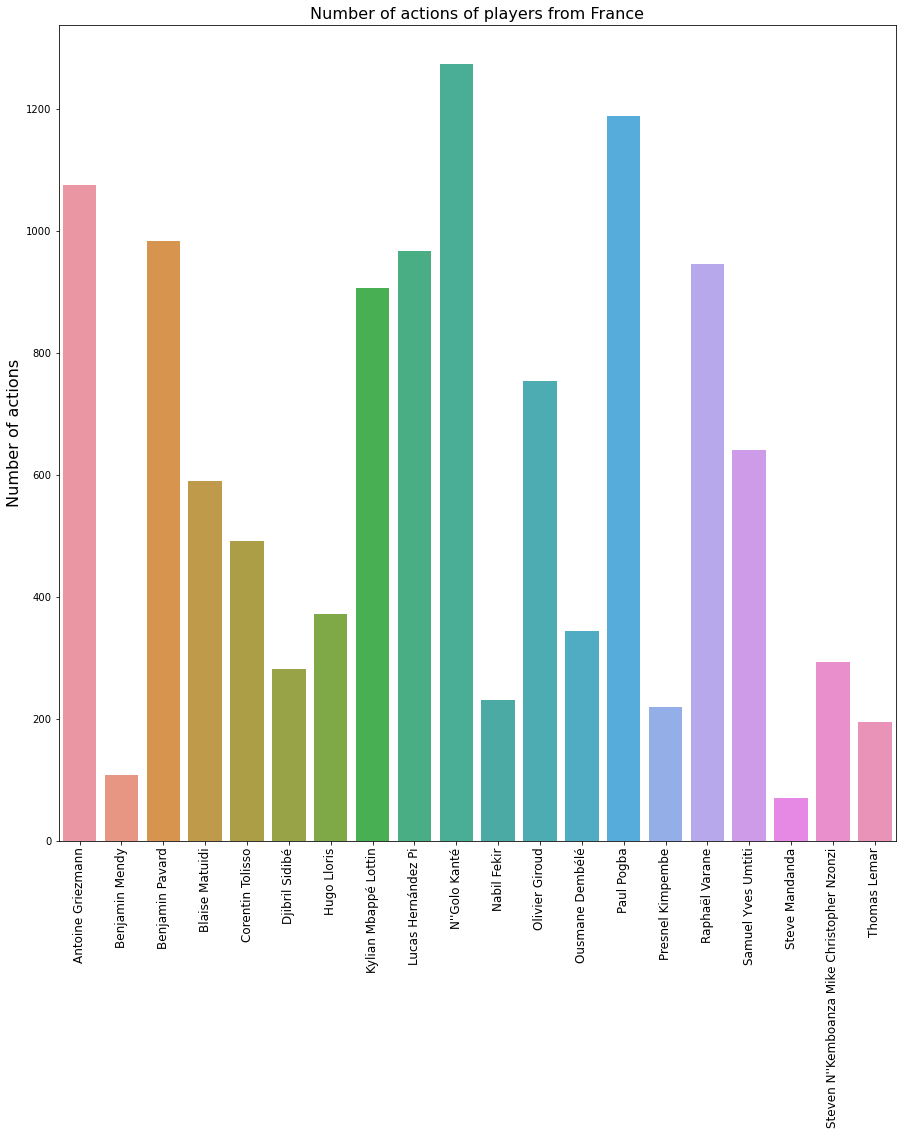

In [111]:
actions_of_the_team(df,'France')

# 2. Визуализация данных

In [115]:
def frequency_of_actions(df,player_name,delta,action='All'):
    df1 = df[df['player_name']==player_name]
    if action=='All':
        actions_1 = [len(df1[(df1['minute']>=i*delta) & (df1['minute']<(i+1)*delta)].index) for i in range(45//delta)]
        actions_1.append(len(df1[(df1['period']==1) & (df1['minute']>=45)].index))
        actions_2 = [len(df1[(df1['minute']>=i*delta) & (df1['minute']<(i+1)*delta)].index) for i in range(45//delta,90//delta)]
        actions_2.append(len(df1[(df1['period']==2) & (df1['minute']>=90)].index))
    else:
        actions_1 = [len(df1[(df1['type_name']==action) & (df1['minute']>=i*delta) & (df1['minute']<(i+1)*delta)].index) for i in range(45//delta)]
        actions_1.append(len(df1[(df1['type_name']==action) & (df1['period']==1) & (df1['minute']>=45)].index))
        actions_2 = [len(df1[(df1['type_name']==action) & (df1['minute']>=i*delta) & (df1['minute']<(i+1)*delta)].index) for i in range(45//delta,90//delta)]
        actions_2.append(len(df1[(df1['type_name']==action) & (df1['period']==2) & (df1['minute']>=90)].index))
    
    plt.figure(figsize=(15,10))
    plt.title('Number of actions of '+player_name, fontsize=16)
    
    times_1 = [str(i*delta)+'-'+str((i+1)*delta) for i in range(45//delta)]
    times_1.append('45+')
    times_2 = [str(i*delta)+'-'+str((i+1)*delta) for i in range(45//delta,90//delta)]
    times_2.append('90+')
    
    plt.subplot(1, 2, 1)
    plt.ylabel('Number of actions: '+action, fontsize=16)
    plt.bar(np.arange(45//delta+1), actions_1, width=0.8)
    plt.title('1 period: '+player_name, fontsize=16)
    plt.ylim(0, max(max(actions_1),max(actions_2))+1)
    plt.xticks(np.arange(45//delta+1),times_1, rotation=90, fontsize=14)
    plt.xlabel('Time periods', fontsize=16)
    
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(45//delta+1), actions_1, width=0.8)
    plt.title('2 period: '+player_name, fontsize=16)
    plt.ylim(0, max(max(actions_1),max(actions_2))+1)
    plt.xticks(np.arange(45//delta+1),times_2, rotation=90, fontsize=14)
    plt.xlabel('Time periods', fontsize=16)
    
    plt.show()

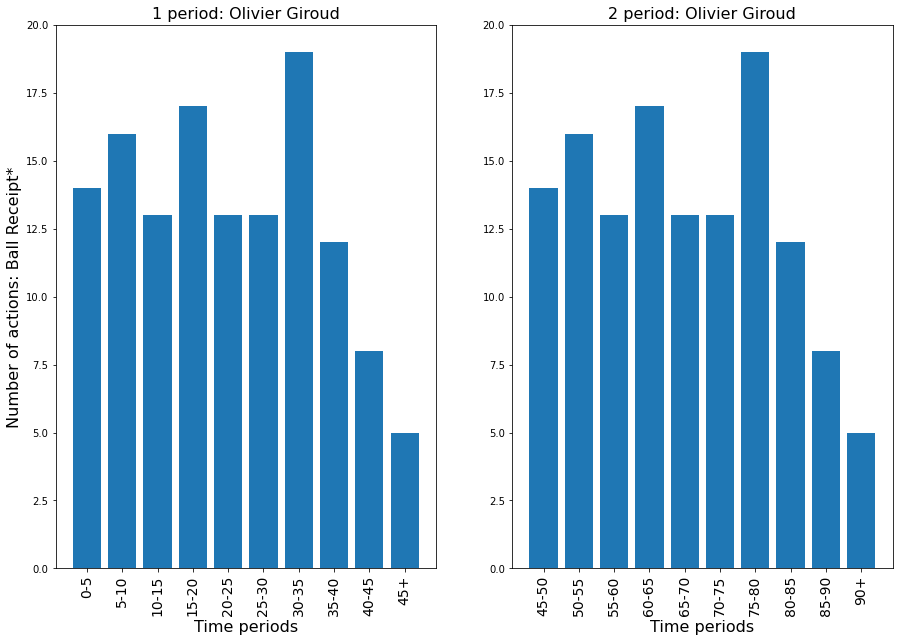

In [116]:
frequency_of_actions(df,player,5,'Ball Receipt*')

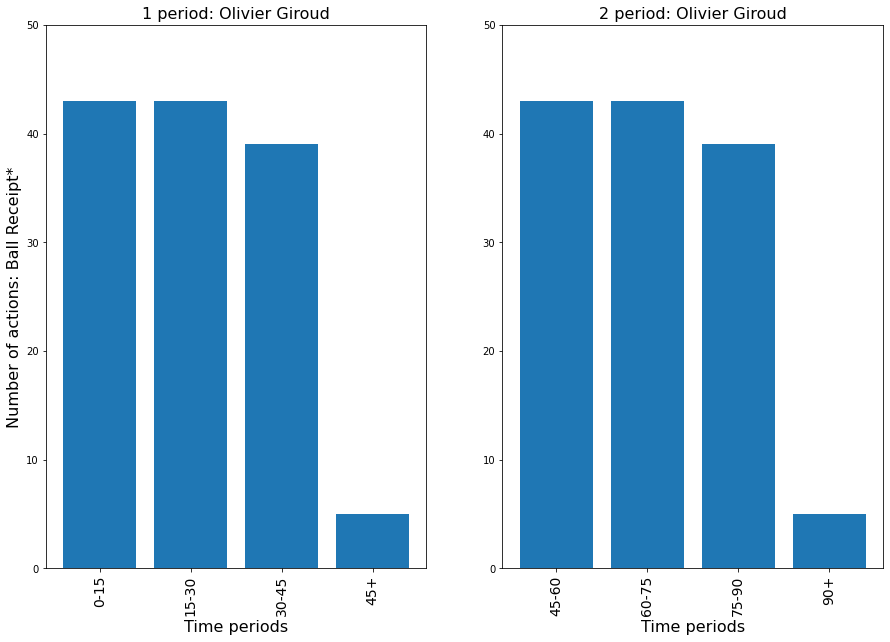

In [117]:
frequency_of_actions(df,player,15,'Ball Receipt*')

In [118]:
def action_density(df,player_name,action,pitchLengthX=120,pitchWidthY=80):
    data = df[(df['player_name']==player_name) & (df['type_name']==action)]
    pitch = Pitch()
    fig, ax = pitch.draw(figsize=(14, 7))
    if action=='Pass':
        for i in range(len(data.index)):
            x = data['x'].iloc[i]
            dx = data['pass_end_x'].iloc[i]-x
            y = data['y'].iloc[i]
            dy = data['pass_end_y'].iloc[i]-y
            cc = plt.Circle((x,pitchWidthY-y),1,color="c",zorder=1)
            ax.add_artist(cc)
            ax.arrow(x,pitchWidthY-y,dx,-dy,width=0.5,color="blue",zorder=2)
    elif action=='Carry':
        for i in range(len(data.index)):
            x = data['x'].iloc[i]
            dx = data['carry_end_x'].iloc[i]-x
            y = data['y'].iloc[i]
            dy = data['carry_end_y'].iloc[i]-y
            cc = plt.Circle((x,pitchWidthY-y),1,color="c",zorder=1)
            ax.add_artist(cc)
            ax.arrow(x,pitchWidthY-y,dx,-dy,width=0.5,color="blue",zorder=2)
    else:
        y = [pitchWidthY-t for t in data['y']]
        sns.kdeplot(data['x'],y, cmap = 'Greens', shade = True)
    plt.title(action, fontsize = 25)
    plt.xlim(-3,pitchLengthX+3)
    plt.ylim(-3,pitchWidthY+3)
    plt.axis('off')
    fig.tight_layout()
    plt.show()

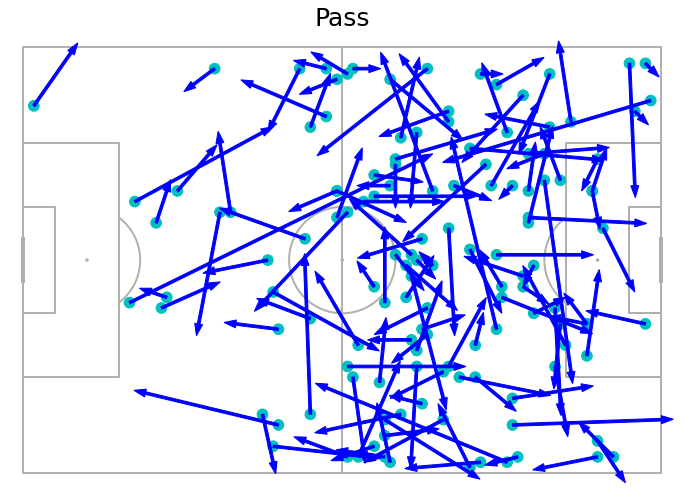

In [119]:
action_density(df,player,'Pass')

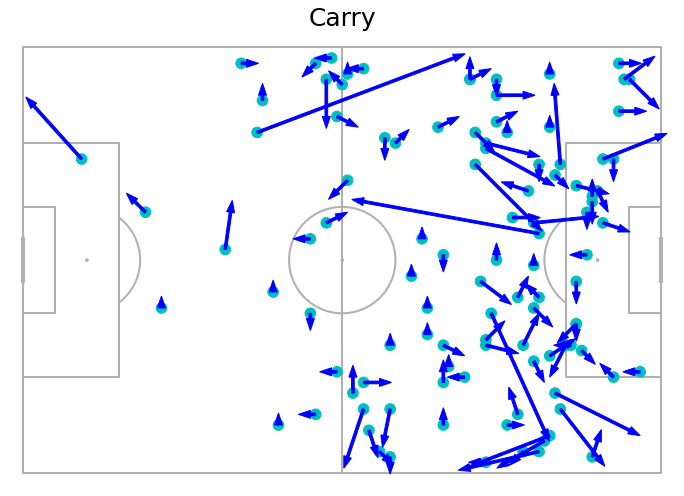

In [120]:
action_density(df,player,'Carry')

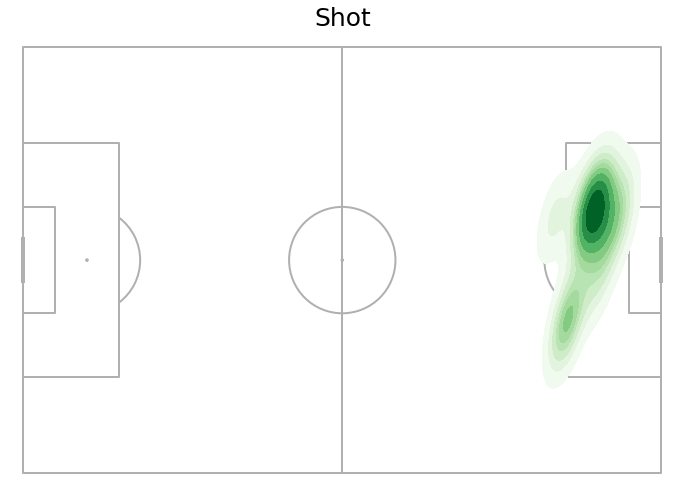

In [121]:
action_density(df,player,'Shot')

In [42]:
def action_heatmap(df,player_name,action,n,m,pitchLengthX=120,pitchWidthY=80):
    data = df[(df['player_name']==player_name) & (df['type_name']==action)]
    pitch = Pitch()
    fig, ax = pitch.draw(figsize=(14, 7))
    y = [pitchWidthY-t for t in data['y']]
    acts = np.histogram2d(y,data['x'],bins=[n,m],range=[[0,pitchWidthY],[0,pitchLengthX]])
    pos = ax.imshow(acts[0], extent=[0,pitchLengthX,0,pitchWidthY], aspect='auto',cmap=plt.cm.Reds)
    fig.colorbar(pos, ax=ax)
    plt.title(player_name+' '+action+' heatmap', fontsize = 25)
    plt.xlim((-1,pitchLengthX+1))
    plt.ylim((pitchWidthY+3,-3))
    plt.tight_layout()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

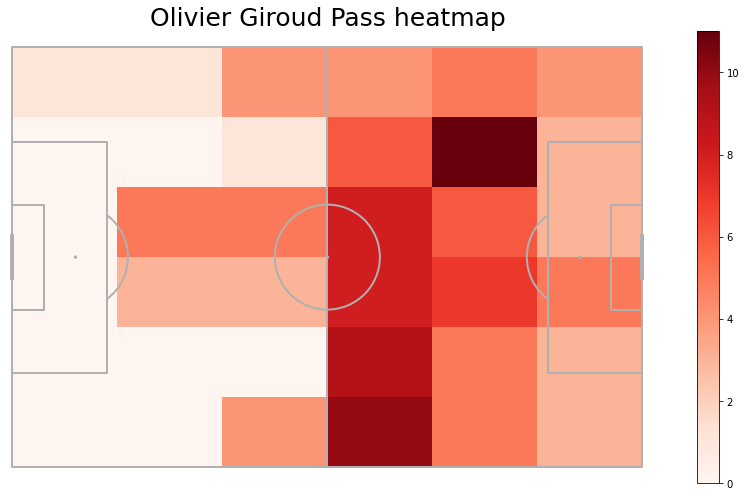

In [43]:
action_heatmap(df,player,'Pass',6,6)

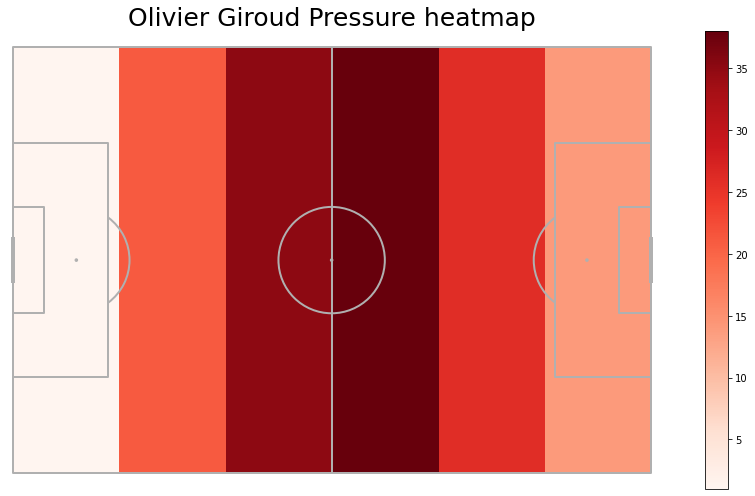

In [44]:
action_heatmap(df,player,'Pressure',1,6)

In [45]:
def pass_accuracy_heatmap(df,player_name,n,m,pitchLengthX=120,pitchWidthY=80):
    data = df[(df['player_name']==player_name) & (df['type_name']=='Pass')]
    accurate_passes = data[data['pass_outcome_name']!='Incomplete']
    inaccurate_passes = data[data['pass_outcome_name']=='Incomplete']
    pitch = Pitch()
    fig, ax = pitch.draw(figsize=(14, 7))
    y1 = [pitchWidthY-t for t in accurate_passes['y']]
    y2 = [pitchWidthY-t for t in inaccurate_passes['y']]
    ac_pass = np.histogram2d(y1,accurate_passes['x'],bins=[n,m],range=[[0,pitchWidthY],[0,pitchLengthX]])
    inac_pass = np.histogram2d(y2,inaccurate_passes['x'],bins=[n,m],range=[[0,pitchWidthY],[0,pitchLengthX]])
    pos = ax.imshow(100*ac_pass[0]/(ac_pass[0]+inac_pass[0]), extent=[0,pitchLengthX,0,pitchWidthY], aspect='auto',cmap=plt.cm.Reds)
    fig.colorbar(pos, ax=ax)
    plt.title(player_name+' pass accuracy heatmap', fontsize = 25)
    plt.xlim((-1,pitchLengthX+1))
    plt.ylim((pitchWidthY+3,-3))
    plt.tight_layout()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

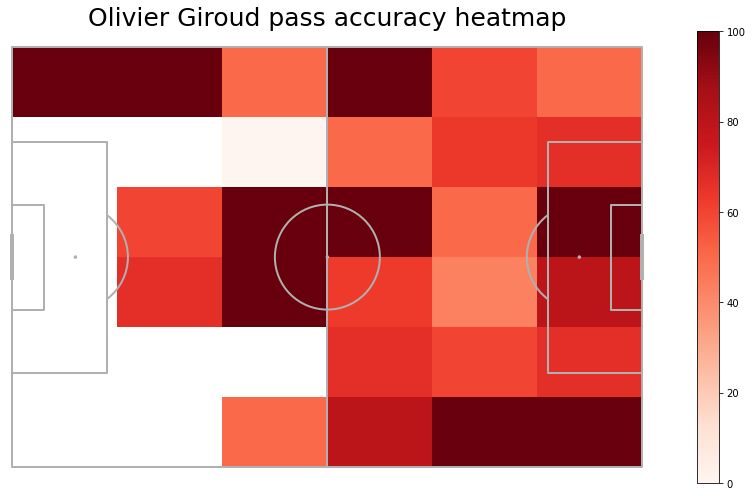

In [46]:
pass_accuracy_heatmap(df,player,6,6)

In [206]:
def teammates_danger_passes_heatmap(df,player_name,n,m,pitchLengthX=120,pitchWidthY=80):
    df1 = df[df['player_name']==player_name]
    danger_passes_by=dict()
    for players in df[df['team_name']==df1['team_name'].unique()[0]]['player_name'].dropna().unique():
        for i,match_id in enumerate(df[df['player_name']==players]['match_id'].unique()):
            player_passes = df[(df['player_name']==players) & (df['type_name']=='Pass') & (df['match_id']==match_id) & (df['pass_type_name']!="Corner")]
            team_shots = df[(df['team_name']==df1['team_name'].unique()[0]) & (df['type_name']=='Shot') & (df['match_id']==match_id)]
    
            team_shot_times = team_shots['minute']*60+team_shots['second']
            shot_window = 15  
            shot_start = team_shot_times - shot_window
            player_pass_times = player_passes['minute']*60+player_passes['second']
    
            def in_range(pass_time,start,finish):
                return (True in ((start < pass_time) & (pass_time < finish)).unique())

            pass_to_shot = player_pass_times.apply(lambda x: in_range(x,shot_start,team_shot_times))
            
            danger_passes = player_passes[pass_to_shot]
        
            if i==0:
                passes =  danger_passes
            else:
                passes = passes.append(danger_passes)
        danger_passes_by[players] = passes

    H_Pass=dict()
    for players in df[df['team_name']==df1['team_name'].unique()[0]]['player_name'].dropna().unique():
        dp=danger_passes_by[players]    
        x=[]
        y=[]
        for i,apass in dp.iterrows():
            x.append(apass['x'])
            y.append(pitchWidthY-apass['y'])
        H_Pass[players]=np.histogram2d(y, x,bins=[n,m],range=[[0, pitchWidthY],[0, pitchLengthX]])

    names = df[df['team_name']==df1['team_name'].unique()[0]]['player_name'].dropna().unique()
    k = np.where(names==player_name)[0][0]
    names = np.delete(names,k)
    
    for players in names:
        pitch = Pitch()
        fig, ax = pitch.draw(figsize=(14, 7))
        pos = ax.imshow(90*H_Pass[player_name][0]/(time_on_the_field(df,player_name)[0]+time_on_the_field(df,player_name)[1]/60)-90*H_Pass[players][0]/(time_on_the_field(df,players)[0]+time_on_the_field(df,players)[1]/60), extent=[0,pitchLengthX,0,pitchWidthY], aspect='auto',cmap=plt.cm.seismic,vmin=-3, vmax=3)
        fig.colorbar(pos, ax=ax)
        plt.title('Dangerous passes per 90 vs '+players, fontsize = 25)
        plt.xlim((-1,pitchLengthX+1))
        plt.ylim((pitchWidthY+3,-3))
        plt.tight_layout()
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

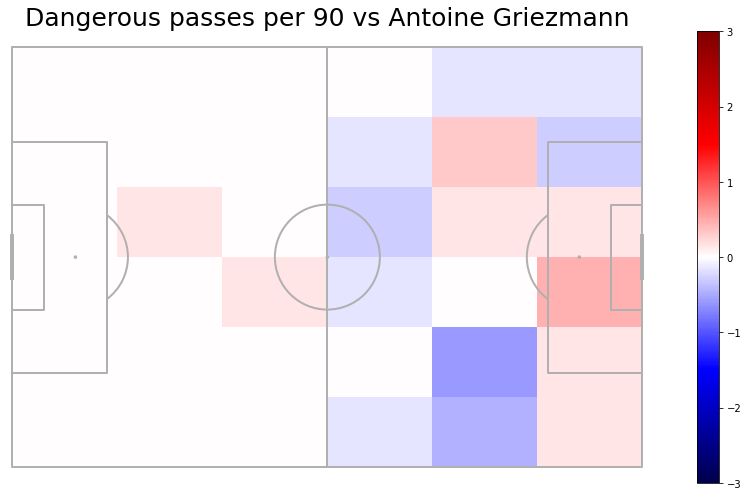

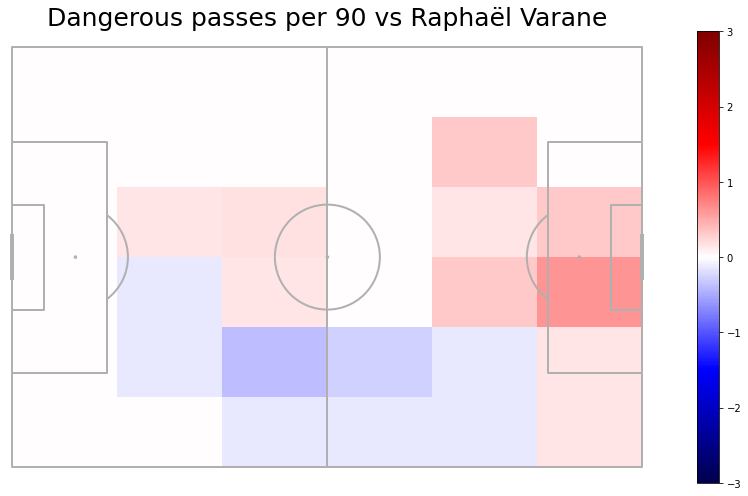

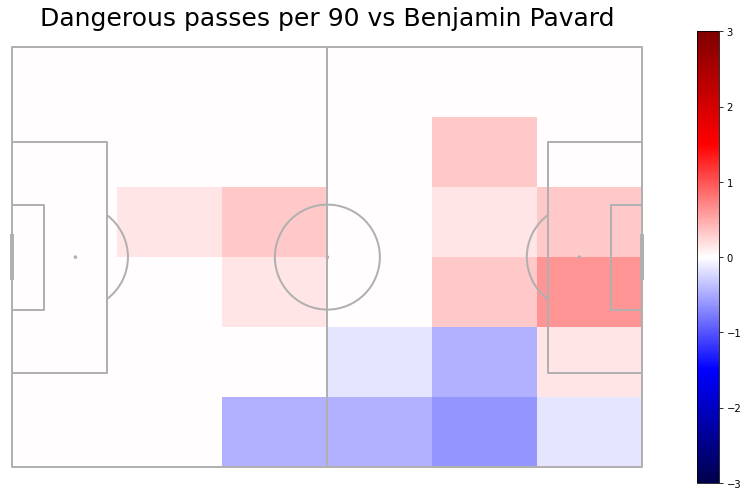

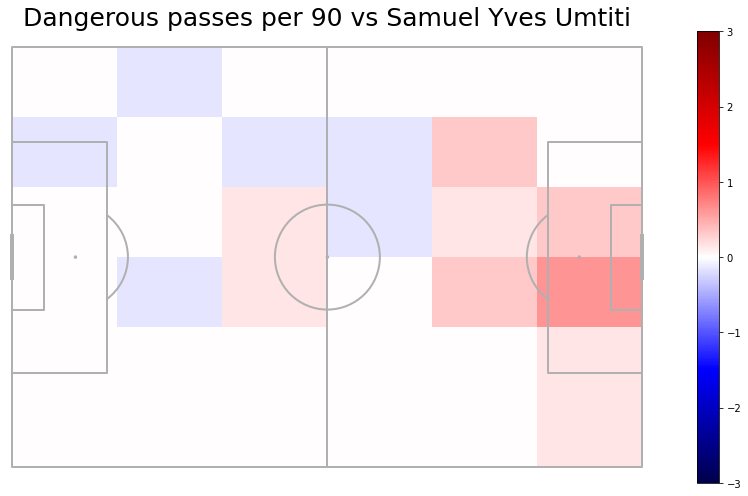

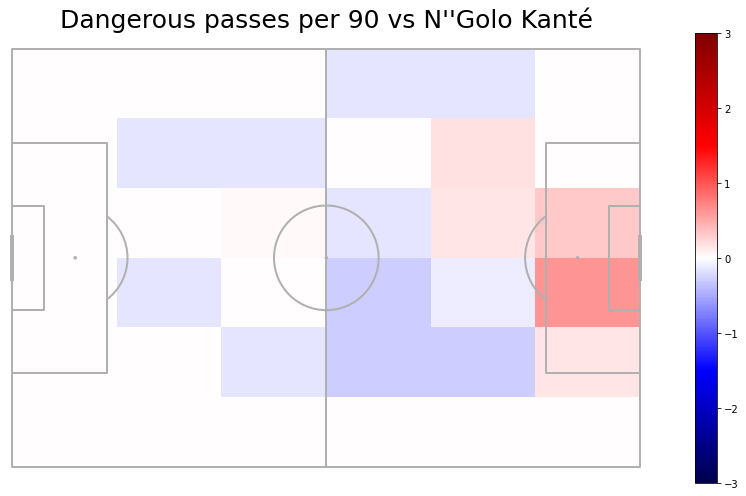

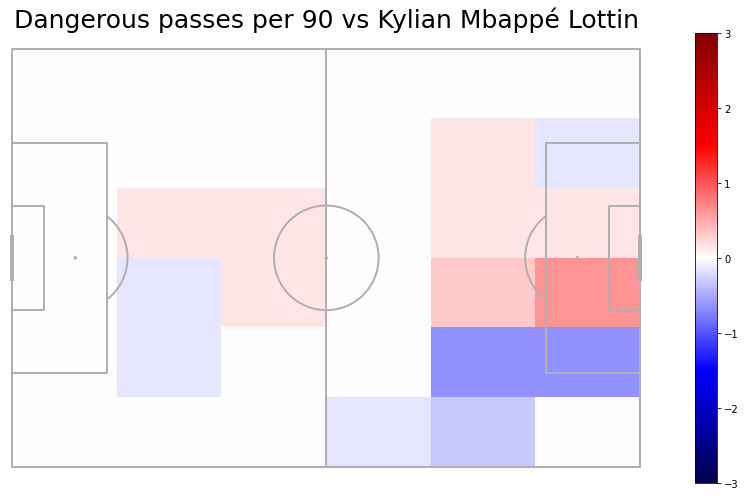

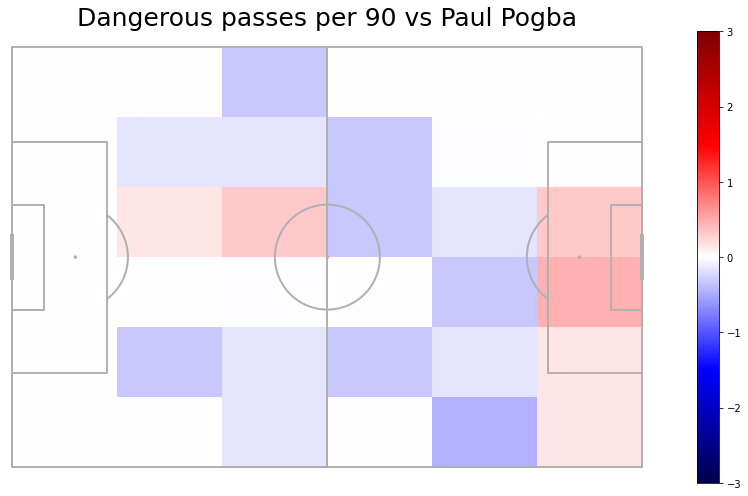

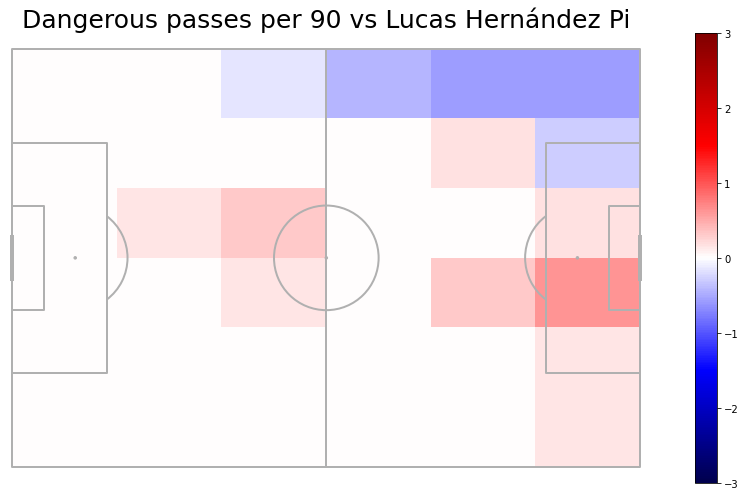

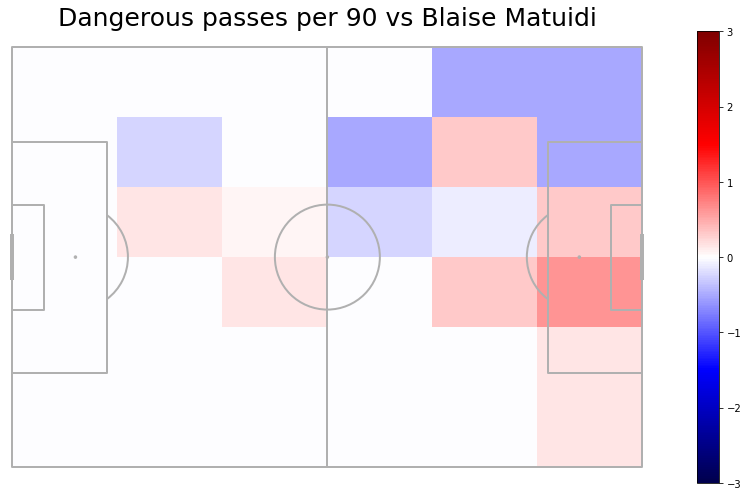

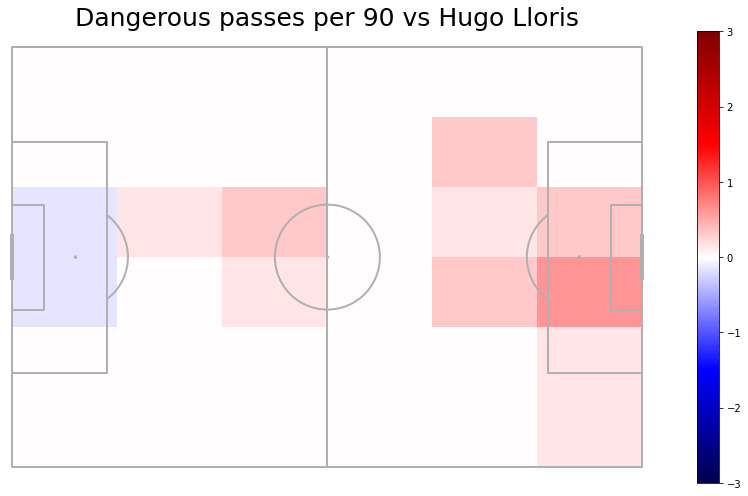

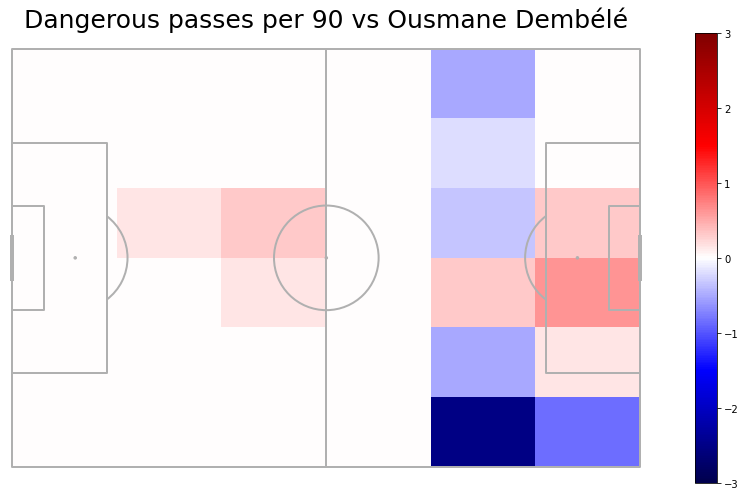

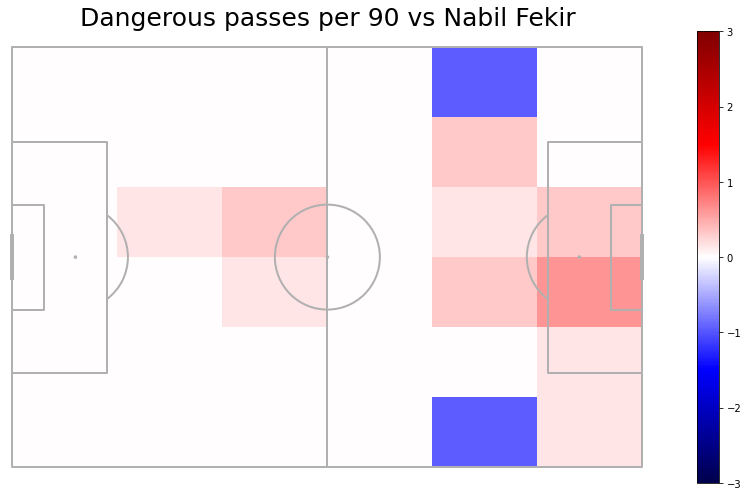

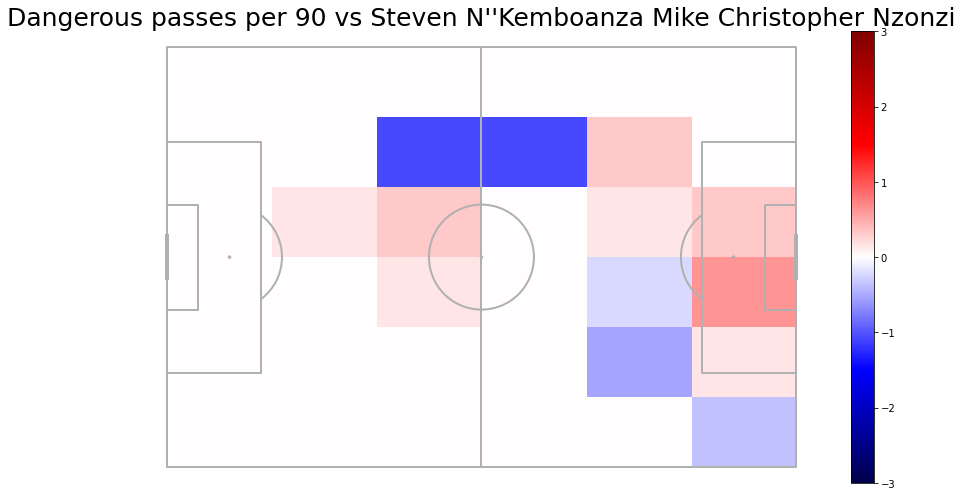

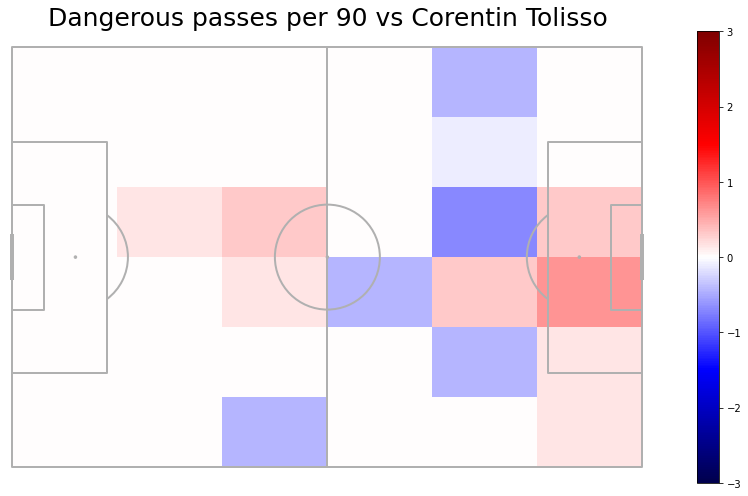

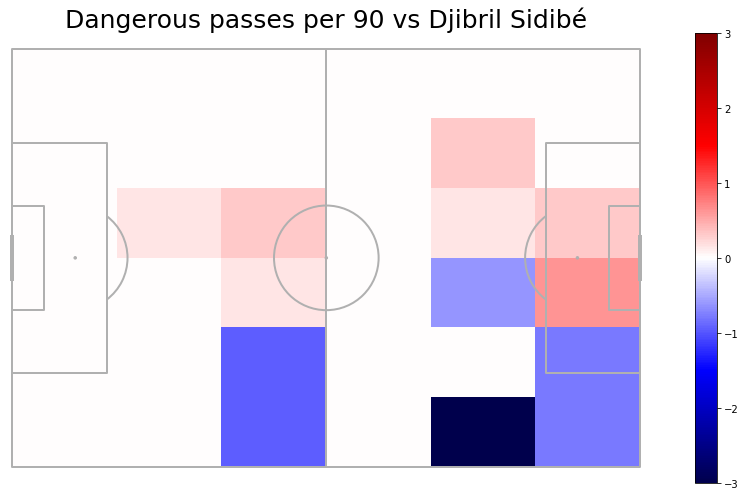

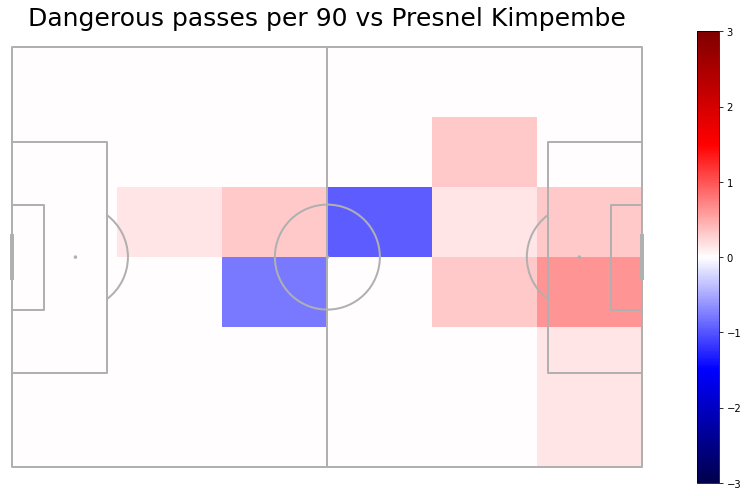

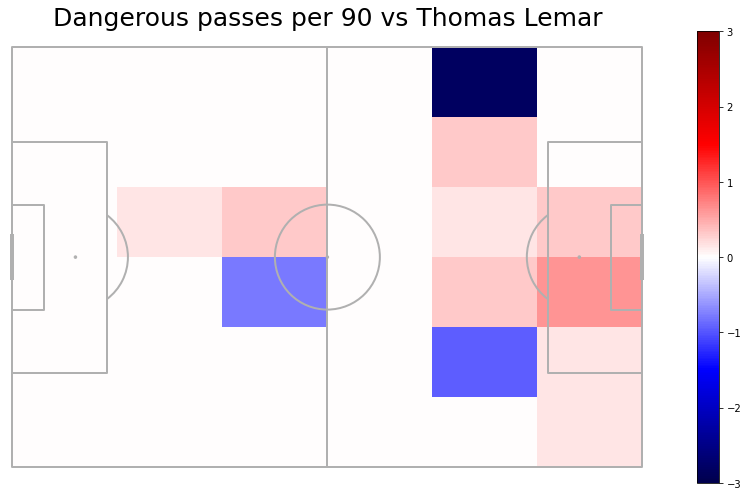

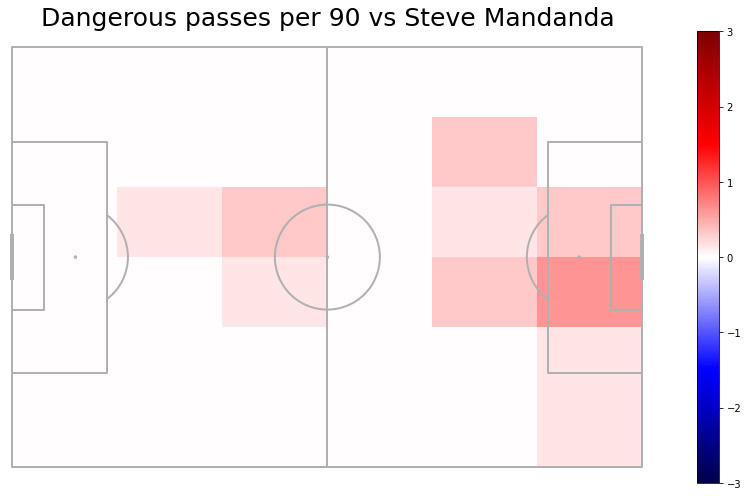

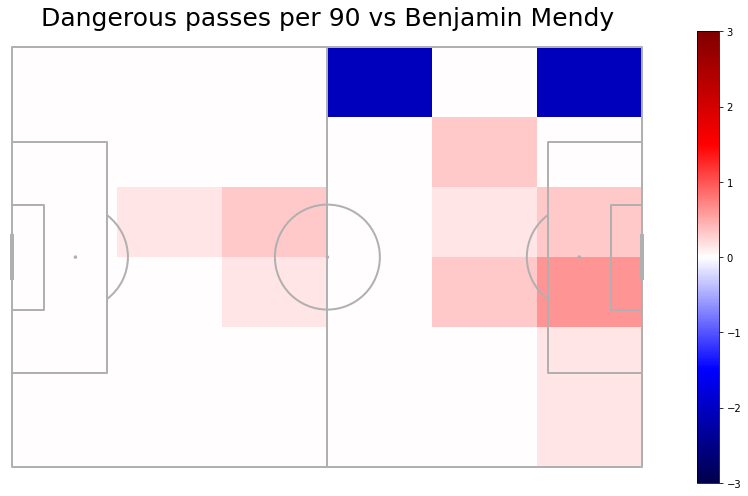

In [205]:
teammates_danger_passes_heatmap(df,player,6,6)

In [207]:
def same_position_danger_passes_heatmap(df,player_name,n,m,sample=10,pitchLengthX=120,pitchWidthY=80):
    df1 = df[df['player_name']==player_name]
    pos = df1['position_id'].unique()
    for i in range(len(pos)):
            if i==0:
                forwards = df[df['position_id']==pos[i]]
            else:
                forwards = forwards.append(df[df['position_id']==pos[i]])
    danger_passes_by=dict()
    for players in forwards['player_name'].unique():
        for i,match_id in enumerate(df[df['player_name']==players]['match_id'].unique()):
            player_passes = df[(df['player_name']==players) & (df['type_name']=='Pass') & (df['match_id']==match_id) & (df['pass_type_name']!='Corner')]
            team_shots = df[(df['team_name']==df[df['player_name']==players]['team_name'].unique()[0]) & (df['type_name']=='Shot') & (df['match_id']==match_id)]
    
            team_shot_times = team_shots['minute']*60+team_shots['second']
            shot_window = 15  
            shot_start = team_shot_times - shot_window
            player_pass_times = player_passes['minute']*60+player_passes['second']
    
            def in_range(pass_time,start,finish):
                return (True in ((start < pass_time) & (pass_time < finish)).unique())

            pass_to_shot = player_pass_times.apply(lambda x: in_range(x,shot_start,team_shot_times))
        
            danger_passes = player_passes[pass_to_shot]
        
            if i==0:
                passes =  danger_passes
            else:
                passes = passes.append(danger_passes)
        danger_passes_by[players] = passes

    H_Pass=dict()
    for players in forwards['player_name'].unique():
        dp=danger_passes_by[players]    
        x=[]
        y=[]
        for i,apass in dp.iterrows():
            x.append(apass['x'])
            y.append(pitchWidthY-apass['y'])
        H_Pass[players]=np.histogram2d(y, x,bins=[n,m],range=[[0, pitchWidthY],[0, pitchLengthX]])
    
    k = np.where(forwards['player_name'].unique()==player_name)[0][0]
    names = np.delete(forwards['player_name'].unique(),k)
    np.random.shuffle(names)
    for players in names[:sample]:
        pitch = Pitch()
        fig, ax = pitch.draw(figsize=(14, 7))
        pos = ax.imshow(90*H_Pass[player_name][0]/(time_on_the_field(df,player_name)[0]+time_on_the_field(df,player_name)[1]/60)-90*H_Pass[players][0]/(time_on_the_field(df,players)[0]+time_on_the_field(df,players)[1]/60), extent=[0,pitchLengthX,0,pitchWidthY], aspect='auto',cmap=plt.cm.seismic,vmin=-3, vmax=3)
        fig.colorbar(pos, ax=ax)
        plt.title('Dangerous passes per 90 vs '+players, fontsize = 25)
        plt.xlim((-1,pitchLengthX+1))
        plt.ylim((pitchWidthY+3,-3))
        plt.tight_layout()
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

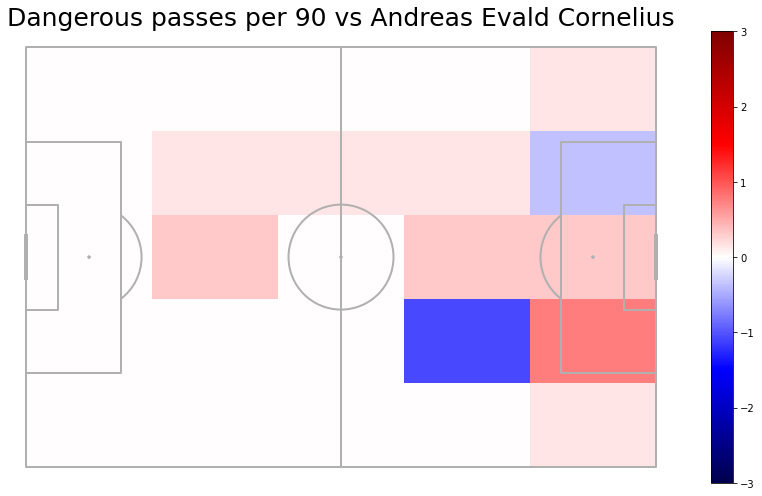

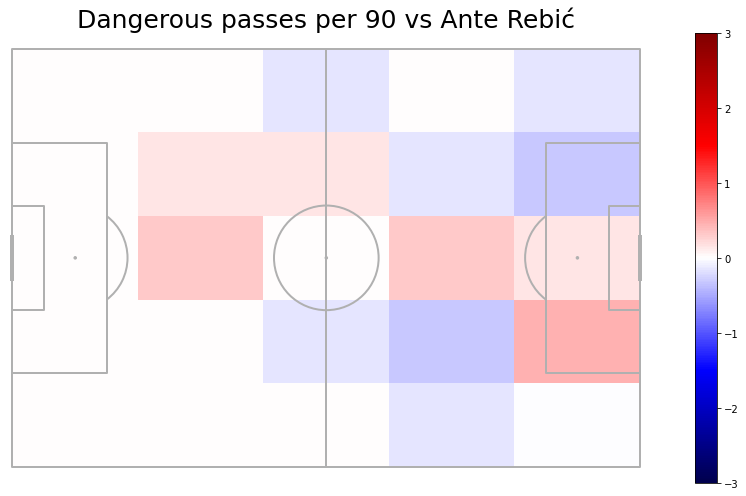

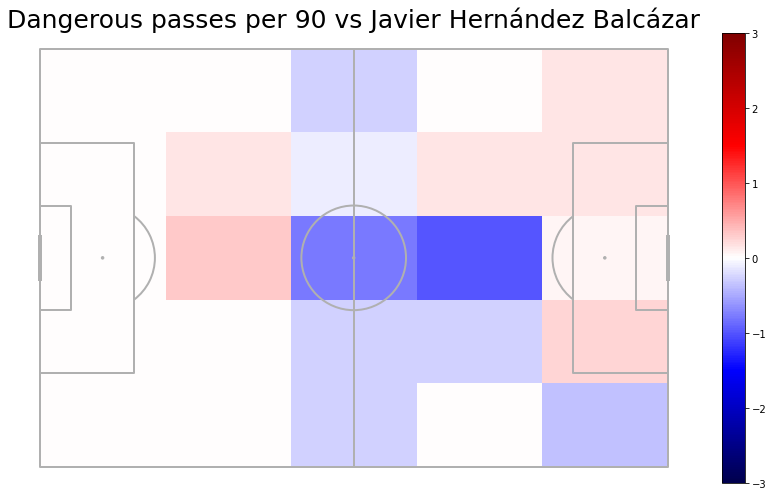

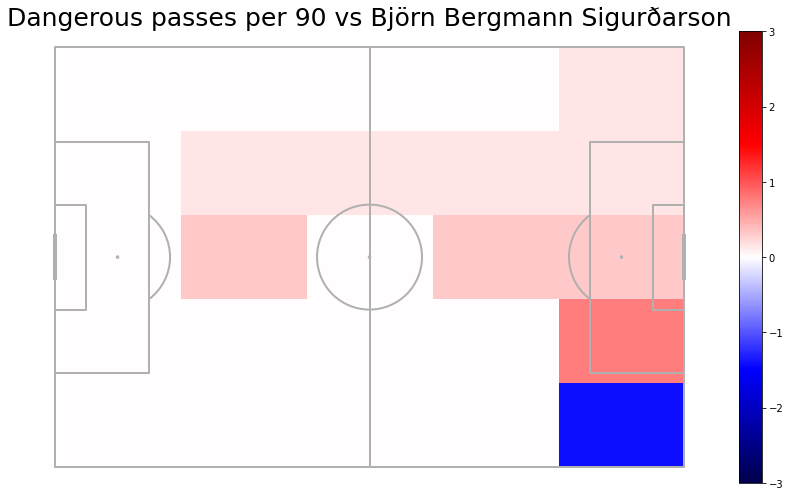

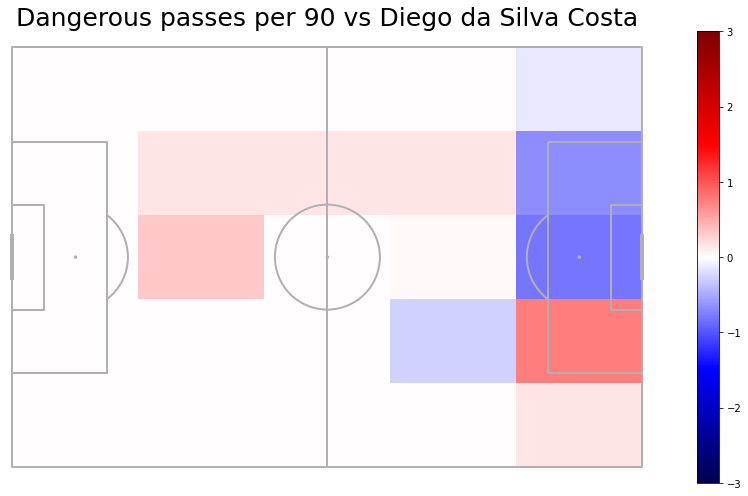

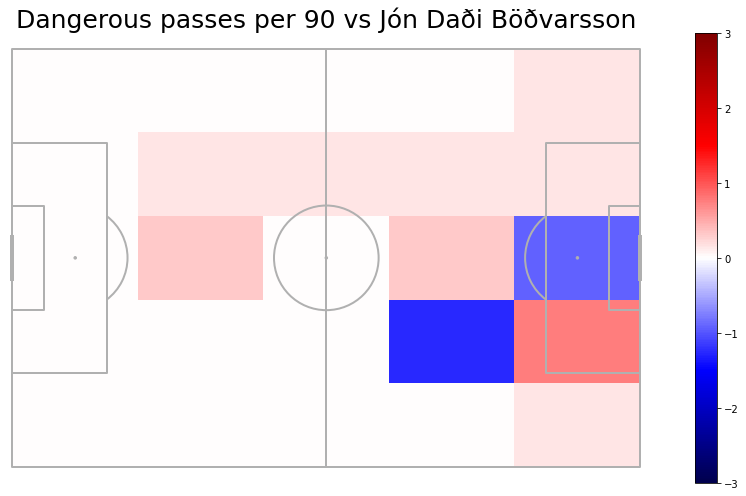

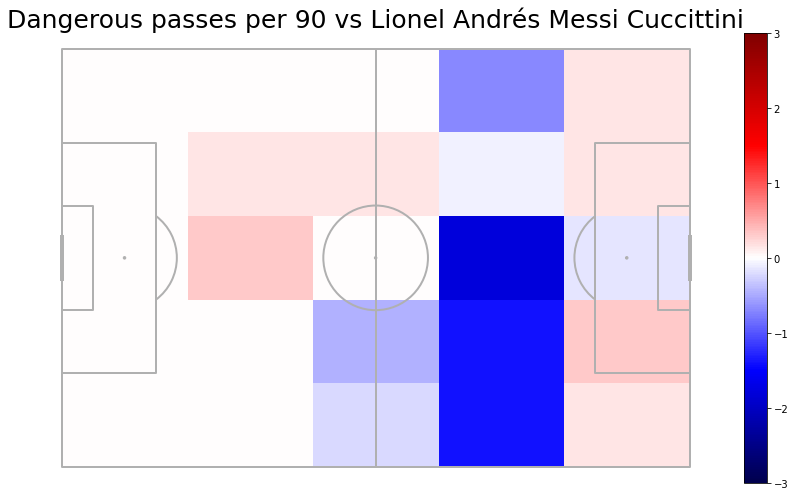

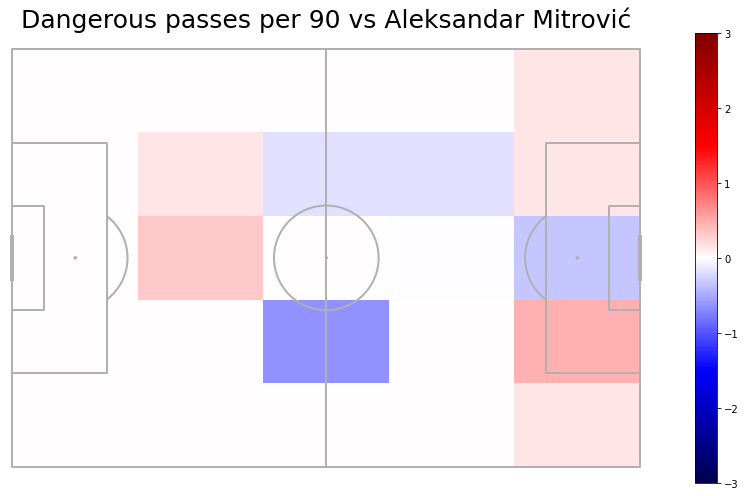

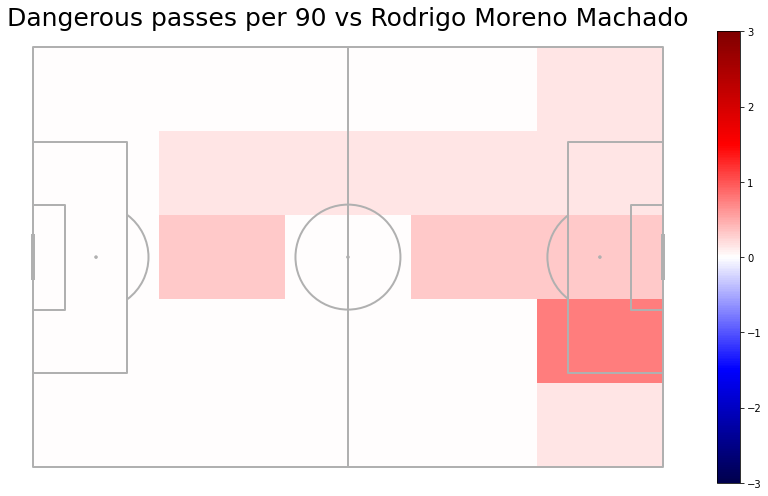

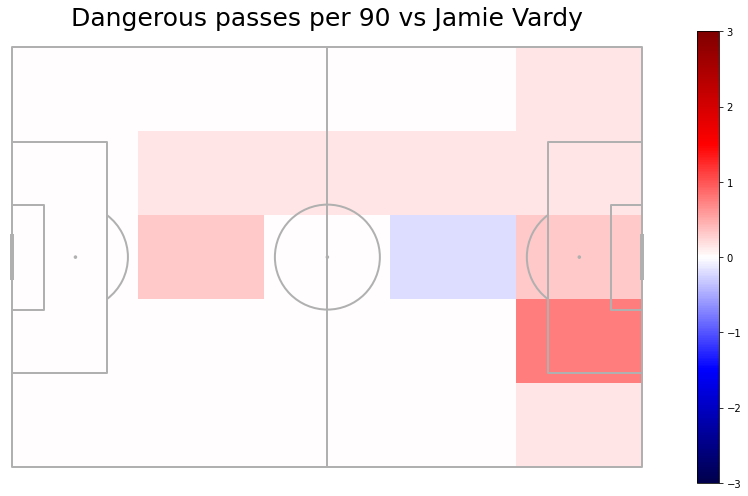

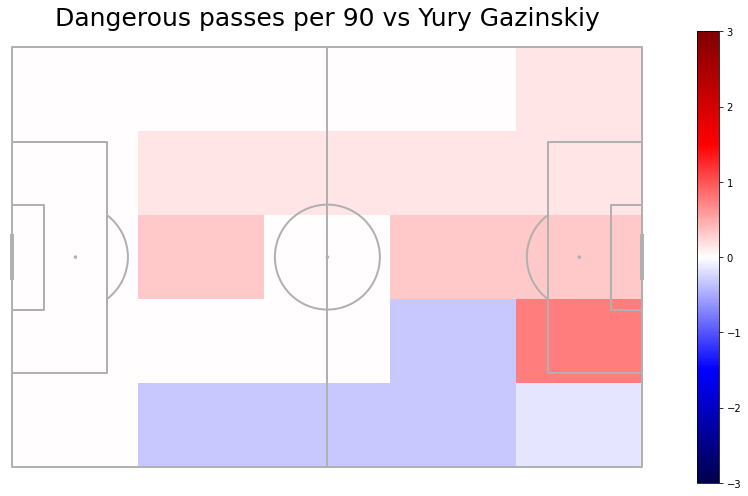

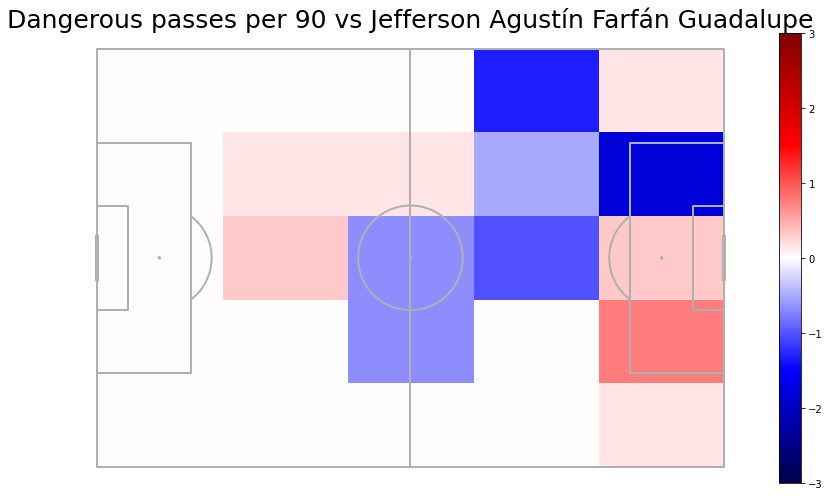

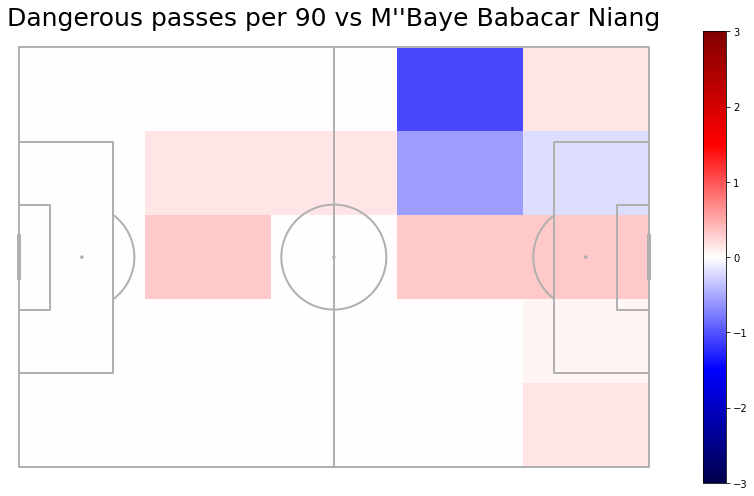

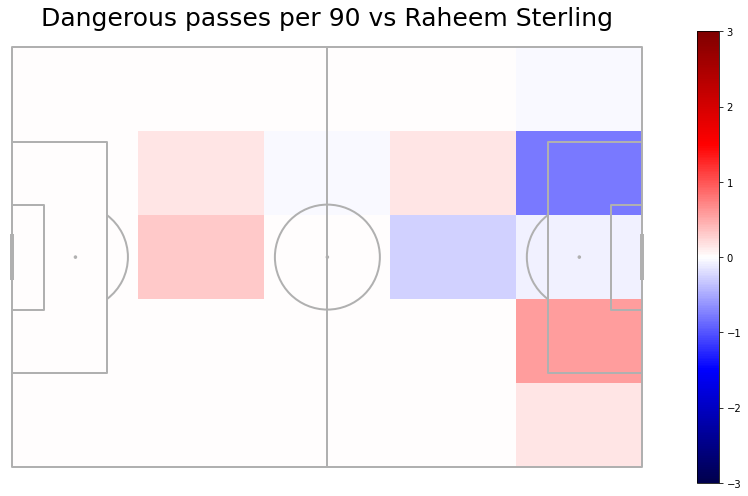

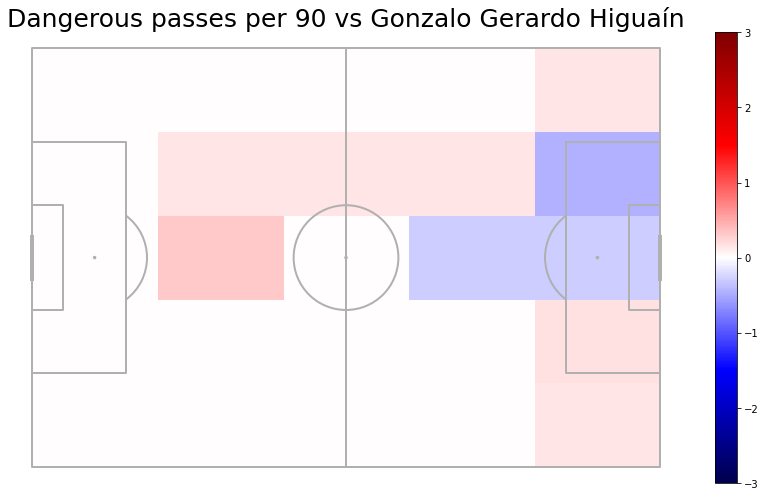

In [208]:
same_position_danger_passes_heatmap(df,player,5,5,15)

In [209]:
def pass_flow(df,player_name,n,m):
    df_pass = df[(df.player_name==player_name) & (df.type_name=='Pass')]
    pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
    bins = (n, m)
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('#22312b')
    bs_heatmap = pitch.bin_statistic(df_pass.x, df_pass.y, statistic='count', bins=bins)
    hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')
    fm = pitch.flow(df_pass.x, df_pass.y, df_pass.pass_end_x, df_pass.pass_end_y,
                    color='black', arrow_type='same',
                    arrow_length=5, bins=bins, ax=ax)
    ax.set_title(f'{player_name} pass flow map', c='white', fontsize=30, pad=-20)

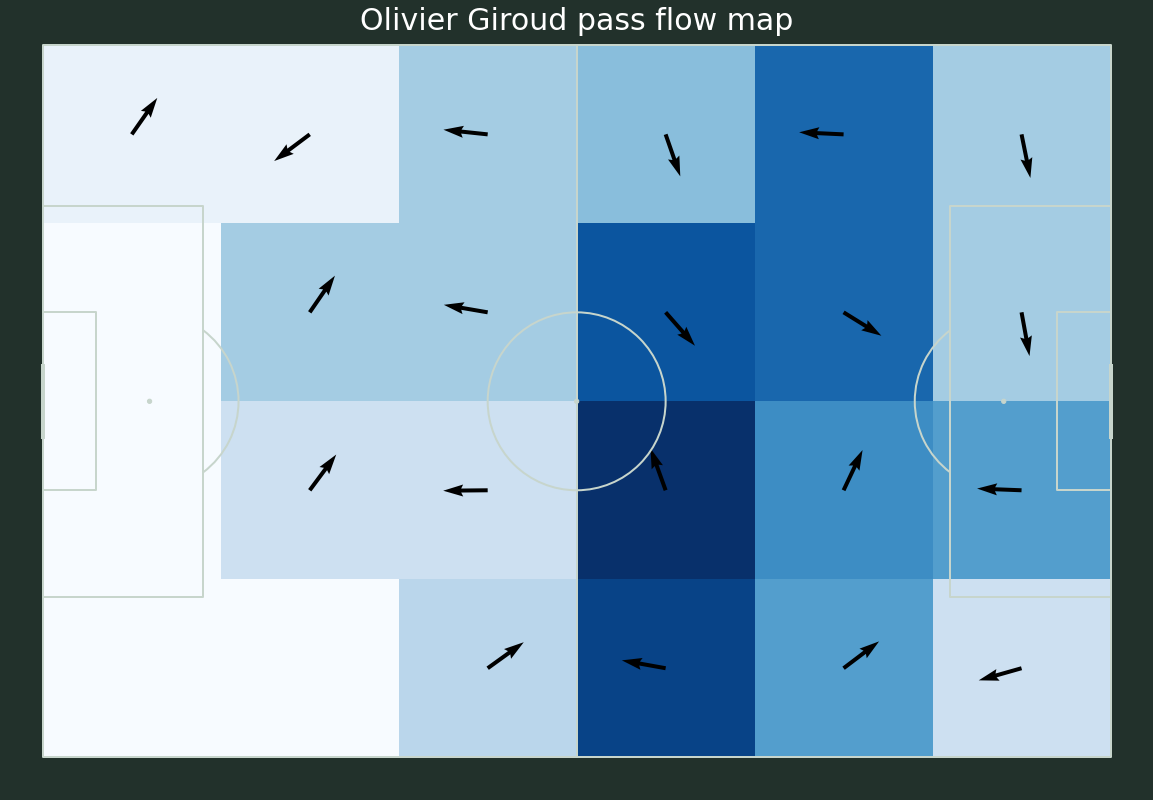

In [210]:
pass_flow(df,player,6,4)

#  3. Расчёт ключевых метрик

In [148]:
def best_connection(df,player_name):
    df1 = df[df['player_name']==player_name]
    recipients = df1[df1['type_name']=='Pass'].groupby(by=['pass_recipient_name']).size().reset_index(name='passes_to')
    frequent_recipients = recipients[recipients['passes_to']==recipients['passes_to'].max()]['pass_recipient_name']
    givers = df[(df['type_name']=='Pass') & (df['pass_recipient_name']==player_name)].groupby(by=['player_name']).size().reset_index(name='passes_from')
    frequent_givers = givers[givers['passes_from']==givers['passes_from'].max()]['player_name']
    return frequent_recipients,frequent_givers

In [149]:
best_connection(df,player)

(0    Antoine Griezmann
 Name: pass_recipient_name, dtype: object,
 6    Hugo Lloris
 Name: player_name, dtype: object)

In [163]:
def passes_to_the_final_third_per_90(df,player_name,pitchLengthX=120,pitchWidthY=80,back='One'):
    df1 = df[df['player_name']==player_name]
    pos = df1['position_id'].unique()
    for i in range(len(pos)):
        if i==0:
            forwards = df[df['position_id']==pos[i]]
        else:
            forwards = forwards.append(df[df['position_id']==pos[i]])
            
    df_passes = forwards[(forwards['type_name']=='Pass') & (forwards['pass_end_x']>pitchLengthX*2/3)].groupby(by=['player_name']).size().reset_index(name='num_of_passes')
    players = forwards.drop_duplicates(subset = ['player_name', 'team_name'])[['player_name', 'team_name']].dropna()
    passes = players.merge(df_passes, on='player_name', how='left').fillna(0)
    passes_per_90 = {k: v*90/(time_on_the_field(df,k)[0]+time_on_the_field(df,k)[1]/60) for k, v in passes[['player_name','num_of_passes']].to_numpy()}
    a = np.array(list(passes_per_90.values()))
    s = a<=passes_per_90[player_name]
    quantile = s.sum()/len(a)
    if back=='All':
        return passes_per_90
    else:
        return passes_per_90[player_name],quantile

In [165]:
passes_to_the_final_third_per_90(df,player)

(9.278616226123313, 0.6705882352941176)

In [168]:
def passes_to_the_penalty_area_per_90(df,player_name,pitchLengthX=120,pitchWidthY=80,back='One'):
    df1 = df[df['player_name']==player_name]
    pos = df1['position_id'].unique()
    for i in range(len(pos)):
        if i==0:
            forwards = df[df['position_id']==pos[i]]
        else:
            forwards = forwards.append(df[df['position_id']==pos[i]])
            
    df_passes = forwards[(forwards['type_name']=='Pass') & (forwards['pass_end_x']>pitchLengthX-16.5) & (forwards['pass_end_y']>(pitchWidthY-40)/2) & (forwards['pass_end_y']<(pitchWidthY+40)/2)].groupby(by=['player_name']).size().reset_index(name='num_of_passes')
    players = forwards.drop_duplicates(subset = ['player_name', 'team_name'])[['player_name', 'team_name']].dropna()
    passes = players.merge(df_passes, on='player_name', how='left').fillna(0)
    passes_per_90 = {k: v*90/(time_on_the_field(df,k)[0]+time_on_the_field(df,k)[1]/60) for k, v in passes[['player_name','num_of_passes']].to_numpy()}
    a = np.array(list(passes_per_90.values()))
    s = a<=passes_per_90[player_name]
    quantile = s.sum()/len(a)
    if back=='All':
        return passes_per_90
    else:
        return passes_per_90[player_name],quantile

In [167]:
passes_to_the_penalty_area_per_90(df,player)

(1.7010796414559408, 0.6470588235294118)

In [171]:
def passes_assisted_shot_per_90(df,player_name,pitchLengthX=120,pitchWidthY=80,back='One'):
    df1 = df[df['player_name']==player_name]
    pos = df1['position_id'].unique()
    for i in range(len(pos)):
        if i==0:
            forwards = df[df['position_id']==pos[i]]
        else:
            forwards = forwards.append(df[df['position_id']==pos[i]])
            
    df_passes = forwards[~forwards['pass_shot_assist'].isna()].groupby(by=['player_name']).size().reset_index(name='num_of_passes')
    players = forwards.drop_duplicates(subset = ['player_name', 'team_name'])[['player_name', 'team_name']].dropna()
    passes = players.merge(df_passes, on='player_name', how='left').fillna(0)
    passes_per_90 = {k: v*90/(time_on_the_field(df,k)[0]+time_on_the_field(df,k)[1]/60) for k, v in passes[['player_name','num_of_passes']].to_numpy()}
    a = np.array(list(passes_per_90.values()))
    s = a<=passes_per_90[player_name]
    quantile = s.sum()/len(a)
    if back=='All':
        return passes_per_90
    else:
        return passes_per_90[player_name],quantile

In [170]:
passes_assisted_shot_per_90(df,player)

(0.6185744150748875, 0.5764705882352941)

In [172]:
def passing_tempo(df,player_name,pitchLengthX=120,pitchWidthY=80):
    passes = df[(df['player_name']==player_name) & (df['type_name']=='Pass') & (df['pass_end_x']>pitchLengthX*2/3)]
    speeds = [math.sqrt((passes.iloc[i]['x']-passes.iloc[i]['pass_end_x'])**2+(passes.iloc[i]['y']-passes.iloc[i]['pass_end_y'])**2)/passes.iloc[i]['duration'] for i in range(len(passes.index))]
    average_speed = sum(speeds)/len(speeds)
    return average_speed

In [173]:
passing_tempo(df,player)

9.709103439322842

In [176]:
def passes_accepted_in_the_final_third_per_90(df,player_name,pitchLengthX=120,pitchWidthY=80,back='One'):
    df1 = df[df['player_name']==player_name]
    pos = df1['position_id'].unique()
    for i in range(len(pos)):
        if i==0:
            forwards = df[df['position_id']==pos[i]]
        else:
            forwards = forwards.append(df[df['position_id']==pos[i]])
            
    df_receipts = forwards[(forwards['type_name']=='Ball Receipt*') & (forwards['x']>pitchLengthX*2/3)].groupby(by=['player_name']).size().reset_index(name='num_of_passes')
    players = forwards.drop_duplicates(subset = ['player_name', 'team_name'])[['player_name', 'team_name']].dropna()
    ball_receipts = players.merge(df_receipts, on='player_name', how='left').fillna(0)
    ball_receipts_per_90 = {k: v*90/(time_on_the_field(df,k)[0]+time_on_the_field(df,k)[1]/60) for k, v in ball_receipts[['player_name','num_of_passes']].to_numpy()}
    a = np.array(list(ball_receipts_per_90.values()))
    s = a<=ball_receipts_per_90[player_name]
    quantile = s.sum()/len(a)
    if back=='All':
        return ball_receipts_per_90
    else:
        return ball_receipts_per_90[player_name],quantile

In [175]:
passes_accepted_in_the_final_third_per_90(df,player)

(21.804748131389786, 0.6823529411764706)

In [177]:
def actions_with_ball_percentage(df,player_name):
    team = df1['team_name'].unique()[0]
    types = np.array(['Pass','Carry','Dribble','Clearance','Shot'])
    for i in range(len(types)):
        if i==0:
            actions = df[(df['team_name']==team) & (df['type_name']==types[i])]
        else:
            actions = actions.append(df[(df['team_name']==team) & (df['type_name']==types[i])])
    actions_dict = dict(Counter(actions['player_name'].dropna()))
    percentage_dict = {k: 100*v/sum(actions_dict.values()) for k, v in actions_dict.items()}
    return percentage_dict

In [178]:
actions_with_ball_percentage(df,player)

{'Antoine Griezmann': 7.953290200410289,
 'Raphaël Varane': 9.673347009626006,
 'Olivier Giroud': 4.181789490295093,
 'Benjamin Pavard': 9.042133501656936,
 'Samuel Yves Umtiti': 6.327915417389932,
 "N''Golo Kanté": 10.620167271579612,
 'Kylian Mbappé Lottin': 7.227394666245858,
 'Paul Pogba': 9.8469307243175,
 'Lucas Hernández Pi': 8.174214928199463,
 'Hugo Lloris': 3.408552943032981,
 'Blaise Matuidi': 3.661038346220609,
 'Ousmane Dembélé': 2.666877071169323,
 'Nabil Fekir': 1.6884961338172637,
 'Corentin Tolisso': 4.118668139498185,
 "Steven N''Kemboanza Mike Christopher Nzonzi": 2.824680448161591,
 'Djibril Sidibé': 2.8404607858608175,
 'Presnel Kimpembe': 2.2408079532902003,
 'Thomas Lemar': 1.7989584977118511,
 'Steve Mandanda': 0.662774183367524,
 'Benjamin Mendy': 1.0415022881489664}

In [196]:
def ball_recovery(df,player_name,seconds):
    num_of_recoveries = 0
    for i,match_id in enumerate(df[df['player_name']==player_name]['match_id'].unique()):
        player_recoveries = df[(df['player_name']==player_name) & (df['type_name']=='Ball Recovery')
                               & (df['match_id']==match_id)]
        team_dispossessions = df[(df['team_name']==df1['team_name'].unique()[0])
                                 & ((df['type_name']=='Dispossessed') | (df['type_name']=='Miscontrol'))
                                 & (df['match_id']==match_id)]
    
        team_dispossessions_times = team_dispossessions['minute']*60+team_dispossessions['second']
        window = seconds
        recovery = team_dispossessions_times + window
        player_recoveries_times = player_recoveries['minute']*60+player_recoveries['second']
    
        def in_range(pass_time,start,finish):
            return (True in ((start < pass_time) & (pass_time < finish)).unique())

        quick_recoveries = player_recoveries_times.apply(lambda x: in_range(x,team_dispossessions_times,recovery))
        num_of_recoveries = num_of_recoveries + quick_recoveries.sum()
    return num_of_recoveries

In [197]:
ball_recovery(df,player,5)

1

#       4. Визуализация

In [211]:
def pizza_plot(df,player1,player2):
    font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                               "Roboto-Regular.ttf?raw=true"))
    font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                               "Roboto-Italic.ttf?raw=true"))
    font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                             "Roboto-Medium.ttf?raw=true"))
    params = ['Passes to the final third per 90','Passes to the penalty area per 90',
              'Passes accepted in the final third per 90','Passes assisted shot per 90']
    values = [round(100*passes_to_the_final_third_per_90(df,player1)[1]),round(100*passes_to_the_penalty_area_per_90(df,player1)[1]),
             round(100*passes_accepted_in_the_final_third_per_90(df,player1)[1]),round(100*passes_assisted_shot_per_90(df,player1)[1])]
    values_2 = [round(100*passes_to_the_final_third_per_90(df,player2)[1]),round(100*passes_to_the_penalty_area_per_90(df,player2)[1]),
               round(100*passes_accepted_in_the_final_third_per_90(df,player2)[1]),round(100*passes_assisted_shot_per_90(df,player2)[1])]
    baker = PyPizza(
        params=params,                  # list of parameters
        background_color="#EBEBE9",     # background color
        straight_line_color="#222222",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        last_circle_color="#222222",    # color of last circle
        other_circle_ls="-.",           # linestyle for other circles
        other_circle_lw=1               # linewidth for other circles
    )

    # plot pizza
    fig, ax = baker.make_pizza(
        values,                     # list of values
        compare_values=values_2,    # comparison values
        figsize=(8, 8),             # adjust figsize according to your need
        kwargs_slices=dict(
            facecolor="#1A78CF", edgecolor="#222222",
            zorder=2, linewidth=1
        ),                          # values to be used when plotting slices
        kwargs_compare=dict(
            facecolor="#FF9300", edgecolor="#222222",
            zorder=2, linewidth=1,
        ),
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, va="center"
        ),                          # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        ),                          # values to be used when adding parameter-values labels
        kwargs_compare_values=dict(
            color="#000000", fontsize=12, fontproperties=font_normal.prop, zorder=3,
            bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
        ),                          # values to be used when adding parameter-values labels
    )

    fig_text(
        0.515, 0.99, player1+' vs '+player2, size=17, fig=fig,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )

    fig.text(
        0.515, 0.942,
        "Percentile Rank vs World Cup 2018 Forwards",
        size=15,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )

    plt.show()

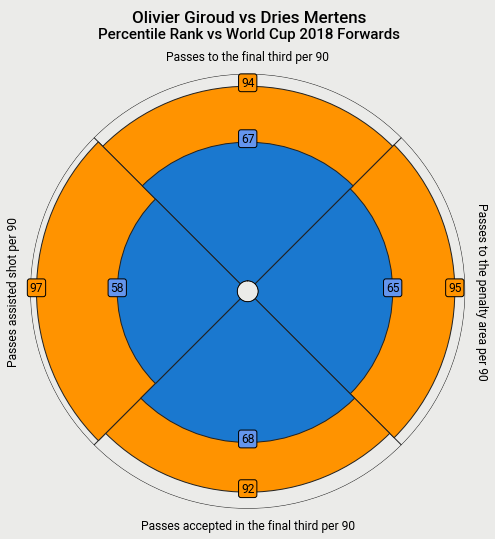

In [212]:
pizza_plot(df,player,'Dries Mertens')

In [59]:
def warmplot(df,player_name):
    df1 = df[df['player_name']==player_name]
    pos = df1['position_id'].unique()
    for i in range(len(pos)):
        if i==0:
            forwards = df[df['position_id']==pos[i]]
        else:
            forwards = forwards.append(df[df['position_id']==pos[i]])
    players = forwards['player_name'].unique()
    xg = [forwards[forwards['player_name']==player]['shot_statsbomb_xg'].dropna().sum() for player in players]
    xg_per_90 = [xg[i]*90/(time_on_the_field(df,players[i])[0]+time_on_the_field(df,players[i])[1]/60) for i in range(len(players))]
    
    text_color = 'white'
    background = '#313332'
    fig, ax = plt.subplots(figsize=(10,5))
    fig.set_facecolor(background)
    ax.patch.set_facecolor(background)

    mpl.rcParams['xtick.color'] = text_color
    mpl.rcParams['ytick.color'] = text_color

    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
    spines = ['top','bottom','left','right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)

    sns.swarmplot(xg_per_90,color='white',zorder=1)
    
    plt.scatter(x=xg_per_90[np.where(players==player_name)[0][0]],y=0,c='red',edgecolor='white',s=200,zorder=2)
    plt.text(s=player_name,x=xg_per_90[np.where(players==player_name)[0][0]],y=-.04,c=text_color)

    plt.title('Forward xg in World Cup 2018',c=text_color,fontsize=14)
    plt.xticks(c=text_color)
    plt.xlabel('Forward xg per 90',c=text_color)
    plt.show()

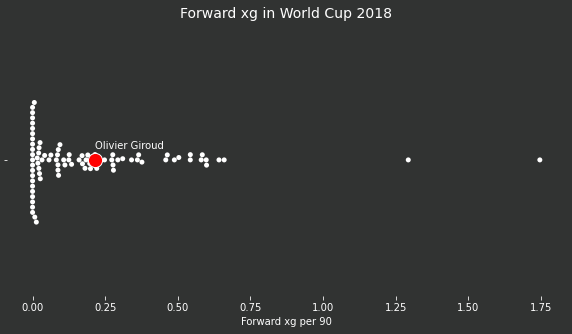

In [60]:
warmplot(df,player)

In [213]:
def barplot(df,player):
    val = [passes_to_the_final_third_per_90(df,player),passes_to_the_penalty_area_per_90(df,player),
          passes_accepted_in_the_final_third_per_90(df,player),passes_assisted_shot_per_90(df,player)]
    metrics = ['Passes to the final third per 90','Passes to the penalty area per 90',
              'Passes accepted in the final third per 90','Passes assisted shot per 90']
    values = [f'{v[0]:.2f}' for v in val]
    procentiles = [100*v[1] for v in val]
  
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.barh(metrics, procentiles)
    
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    ax.set_xticks(np.arange(0,101,10))
    
    ax.set_yticklabels(metrics, fontsize = 15)
    ax.set_xlim([0, 100])

    ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
    ax.invert_yaxis()
  
    for k, i in enumerate(ax.patches):
        plt.text(i.get_width()+0.8, i.get_y()+0.5, str(values[k]), fontsize=15, fontweight='bold', color='grey')

    ax.set_title('Olivier Giroud barplot', loc='left', fontsize=25)
    ax.set_xlabel('Percentile Rank', fontsize=15)
    ax.axvline(x=50,c='r')
    plt.text(50.5,3.55,'Median', fontsize=12)
    plt.show()

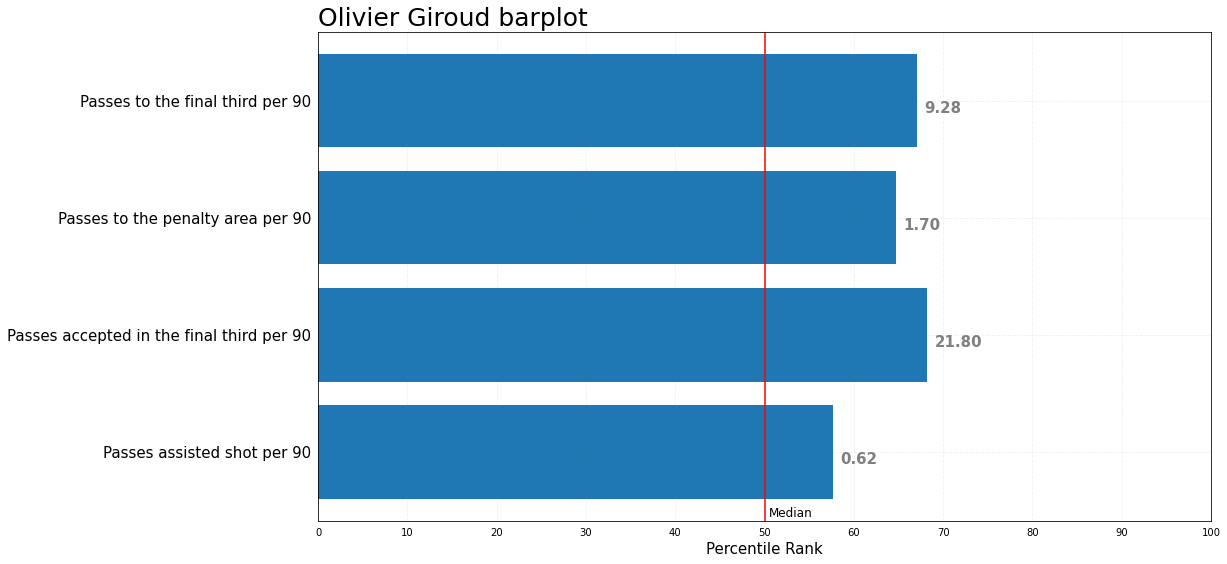

In [214]:
barplot(df,player)

In [215]:
def scatter_plot_4_vs_8(df,player_name):
    
    df1 = passes_to_the_final_third_per_90(df,player_name,back='All')
    df2 = passes_assisted_shot_per_90(df,player_name,back='All')
    
    dfp = df[df['player_name']==player_name]
    pos = dfp['position_id'].unique()
    for i in range(len(pos)):
        if i==0:
            forwards = df[df['position_id']==pos[i]]
        else:
            forwards = forwards.append(df[df['position_id']==pos[i]])
    players = forwards['player_name'].dropna().unique()
    x=[]
    y=[]
    for player in players:
        if player not in list(df1.keys()):
            df1[player] = 0
        if player not in list(df2.keys()):
            df2[player] = 0
        x.append(df1[player])
        y.append(df2[player])
    fig, ax = plt.subplots(figsize=(8,8))
    fig.set_facecolor("w")
    
    ax.grid()

    ax.scatter(x,y,s=120,c='lightblue',zorder=1)

    x1 = df1[player_name]
    y1 = df2[player_name]

    ax.scatter(x1,y1,s=120,c='r',zorder=2)
    ax.text(x1,y1-0.15,player_name,color='k',fontsize=14, ha="center")

    fig.text(0.2,1,"{}'s statistics".format(player_name), fontsize=16, fontweight="bold")        

    ax.set_xlabel('Passes to the final third per 90', fontweight="bold", fontsize=14)
    ax.set_ylabel('Passes assisted shot per 90', fontweight="bold", fontsize= 14)

    plt.tight_layout()
    plt.show()

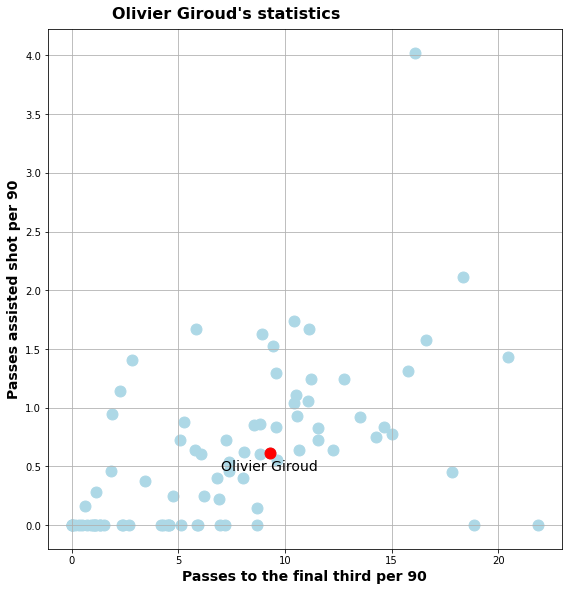

In [216]:
scatter_plot_4_vs_8(df,player)

# 5. Convex Hulls

In [279]:
def convex_hull(df,player_name):
    fig, ax = plt.subplots(figsize=(13,8.5))
    fig.set_facecolor('#3b3b38')
    ax.patch.set_facecolor('#3b3b38')

    pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
                  pitch_color='#3b3b38', line_color='#c7d5cc', figsize=(13, 8),
                  constrained_layout=False, tight_layout=True)

    pitch.draw(ax=ax)
    plt.gca().invert_yaxis()

    df1 = df[df["player_name"]==player_name]
    df1 = df1[df1['type_name']=='Pass']
    df1 = df1[(np.abs(stats.zscore(df1[['x','y']]))<2).x]
    df1 = df1[(np.abs(stats.zscore(df1[['x','y']]))<2).y]

    points = df1[['x', 'y']].values

    hull = ConvexHull(points)

    plt.scatter(df1.x,df1.y)
    plt.title(player_name+' action area', c='white', fontsize = 25)

    for i in hull.simplices:
        plt.plot(points[i, 0], points[i, 1], 'white')
        plt.fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.01)
    plt.show()

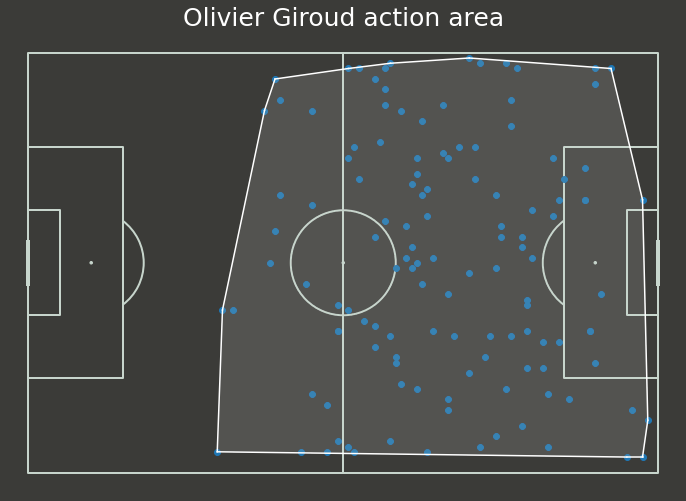

In [280]:
convex_hull(df,player)

# 6. Passing network

In [229]:
# В процессе...
from matplotlib.colors import to_rgba
from mplsoccer import Pitch, FontManager
from mplsoccer.statsbomb import read_event, EVENT_SLUG

def passing_network(df,player_name,pitchLengthX=120,pitchWidthY=80):
    team = df[df.player_name==player_name].team_name.unique()[0]
    team_df = df[df.team_name==team]
    #team_passes = df[(df.team_name==team) & (df.type_name=='Pass')]
    #passes_1 = team_passes[team_passes.x<pitchLengthX/3]
    #passes_2 = team_passes[(team_passes.x>=pitchLengthX/3) & (team_passes.x<2*pitchLengthX/3)]
    #passes_3 = team_passes[team_passes.x>=2*pitchLengthX/3]
    tactics = team_df.tactics_formation.dropna().unique()
    formation = tactics[0]
    h = team_df[df.tactics_formation==formation]['tactics_lineup']
    players_id = [h[h.notnull()].iloc[0][i]['position']['id'] for i in range(11)]
    match_ids = team_df.match_id.dropna().unique()
    data = pd.DataFrame() 
    for i in match_ids:
        shift = team_df[(team_df.tactics_formation.notnull()) & (team_df.match_id==i)]
        c = len(shift.index)
        if c!=0:
            time = [shift.timestamp.iloc[i] for i in range(c)]
            for i in range(c-1):
                if shift.iloc[i]['tactics_formation']==formation:    
                    data = data.append(team_df[(team_df.timestamp>time[i])&(team_df.timestamp<time[i+1])&(team_df.match_id==i)])
            if shift.iloc[c-1]['tactics_formation']==formation:    
                data = data.append(team_df[(team_df.timestamp>time[c-1]) & (team_df.match_id==i)])
    return data

In [230]:
passing_network(df,player)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,y,pass_end_x,pass_end_y,carry_end_x,carry_end_y,shot_end_x,shot_end_y,goalkeeper_end_x,goalkeeper_end_y,num_of_actions
18417,477db2d7-76a8-414e-a8c3-40b597c7f1ce,5,1,2021-12-05 00:00:00.100,0,0,2,0.800,30,Pass,...,41.0,28.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,1074.0
18418,b6091f2c-fe82-46ed-a59a-bd4ebdfa439b,6,1,2021-12-05 00:00:00.900,0,0,2,NaN,42,Ball Receipt*,...,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,945.0
18419,401682aa-0746-4854-b56e-b024b0354538,7,1,2021-12-05 00:00:00.900,0,0,2,1.973,30,Pass,...,38.0,85.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,945.0
18420,a9fc0768-8ea7-47d4-9e74-9d76a610196d,8,1,2021-12-05 00:00:02.873,0,2,2,NaN,42,Ball Receipt*,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,754.0
18421,c8e008f4-c818-415b-9932-52e1ec360fc0,9,1,2021-12-05 00:00:02.873,0,2,2,0.827,30,Pass,...,56.0,86.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221005,102559b8-8a11-4531-8d3e-47cfe511ba48,3597,2,2021-12-05 00:47:49.680,92,49,159,NaN,42,Ball Receipt*,...,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.0
221006,65063614-c2bf-45cd-84bf-c8f6f3a9b6f1,3598,2,2021-12-05 00:47:49.680,92,49,159,3.160,43,Carry,...,72.0,NaN,NaN,86.0,68.0,NaN,NaN,NaN,NaN,281.0
221007,1181a155-529b-4117-b412-9905b3c015aa,3599,2,2021-12-05 00:47:52.840,92,52,159,NaN,38,Miscontrol,...,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.0
221008,40d1350b-0ec8-4efa-903a-f46919952820,3600,2,2021-12-05 00:47:53.602,92,53,159,0.998,17,Pressure,...,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1273.0


In [221]:
d=df[df.team_name=='France'][['type_name','tactics_formation','match_id','tactics_lineup']]
d[d.tactics_formation.notnull()]

,type_name,tactics_formation,match_id,tactics_lineup
18413,Starting XI,4231.0,7546,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'..."
47459,Starting XI,4231.0,7580,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'..."
86063,Starting XI,433.0,7530,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'..."
110139,Starting XI,4231.0,8649,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'..."
113027,Tactical Shift,433.0,8649,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'..."
113514,Starting XI,442.0,8658,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'..."
116085,Tactical Shift,442.0,8658,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'..."
202232,Starting XI,4231.0,8655,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'..."
205297,Tactical Shift,442.0,8655,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'..."
217410,Starting XI,4231.0,7563,"[{'player': {'id': 3543, 'name': 'Steve Mandan..."


In [222]:
d=df[df.team_name=='Russia'][['type_name','tactics_formation','match_id','tactics_lineup']]
d[d.tactics_formation.notnull()]

,type_name,tactics_formation,match_id,tactics_lineup
89537,Starting XI,4231.0,7558,"[{'player': {'id': 5172, 'name': 'Igor Akinfee..."
90635,Tactical Shift,4231.0,7558,"[{'player': {'id': 5172, 'name': 'Igor Akinfee..."
123418,Starting XI,343.0,7582,"[{'player': {'id': 5172, 'name': 'Igor Akinfee..."
125419,Tactical Shift,451.0,7582,"[{'player': {'id': 5172, 'name': 'Igor Akinfee..."
127619,Tactical Shift,451.0,7582,"[{'player': {'id': 5172, 'name': 'Igor Akinfee..."
159703,Starting XI,451.0,7525,"[{'player': {'id': 5172, 'name': 'Igor Akinfee..."
160500,Tactical Shift,451.0,7525,"[{'player': {'id': 5172, 'name': 'Igor Akinfee..."
210012,Starting XI,4231.0,7540,"[{'player': {'id': 5172, 'name': 'Igor Akinfee..."
213361,Starting XI,4231.0,8652,"[{'player': {'id': 5172, 'name': 'Igor Akinfee..."


In [219]:
d=df[df.team_name=='Russia'][['type_name','tactics_formation','match_id','tactics_lineup']]
d[d.tactics_formation.notnull()]['tactics_lineup'].iloc[3]

[{'player': {'id': 5172, 'name': 'Igor Akinfeev'},
  'position': {'id': 1, 'name': 'Goalkeeper'},
  'jersey_number': 1},
 {'player': {'id': 5170, 'name': 'Mário Figueira Fernandes'},
  'position': {'id': 2, 'name': 'Right Back'},
  'jersey_number': 2},
 {'player': {'id': 5175, 'name': 'Ilya Kutepov'},
  'position': {'id': 3, 'name': 'Right Center Back'},
  'jersey_number': 3},
 {'player': {'id': 5174, 'name': 'Sergei Ignashevich'},
  'position': {'id': 5, 'name': 'Left Center Back'},
  'jersey_number': 4},
 {'player': {'id': 6353, 'name': 'Vladimir Granat'},
  'position': {'id': 6, 'name': 'Left Back'},
  'jersey_number': 14},
 {'player': {'id': 5179, 'name': 'Daler Kuzyaev'},
  'position': {'id': 10, 'name': 'Center Defensive Midfield'},
  'jersey_number': 7},
 {'player': {'id': 5171, 'name': 'Roman Zobnin'},
  'position': {'id': 12, 'name': 'Right Midfield'},
  'jersey_number': 11},
 {'player': {'id': 5177, 'name': 'Aleksandr Golovin'},
  'position': {'id': 13, 'name': 'Right Center 

In [220]:
d=df[df.team_name=='Russia'][['type_name','tactics_formation','match_id','tactics_lineup']]
d[d.tactics_formation.notnull()]['tactics_lineup'].iloc[4]

[{'player': {'id': 5172, 'name': 'Igor Akinfeev'},
  'position': {'id': 1, 'name': 'Goalkeeper'},
  'jersey_number': 1},
 {'player': {'id': 5170, 'name': 'Mário Figueira Fernandes'},
  'position': {'id': 2, 'name': 'Right Back'},
  'jersey_number': 2},
 {'player': {'id': 5175, 'name': 'Ilya Kutepov'},
  'position': {'id': 3, 'name': 'Right Center Back'},
  'jersey_number': 3},
 {'player': {'id': 5174, 'name': 'Sergei Ignashevich'},
  'position': {'id': 5, 'name': 'Left Center Back'},
  'jersey_number': 4},
 {'player': {'id': 6353, 'name': 'Vladimir Granat'},
  'position': {'id': 6, 'name': 'Left Back'},
  'jersey_number': 14},
 {'player': {'id': 5171, 'name': 'Roman Zobnin'},
  'position': {'id': 10, 'name': 'Center Defensive Midfield'},
  'jersey_number': 11},
 {'player': {'id': 5177, 'name': 'Aleksandr Golovin'},
  'position': {'id': 13, 'name': 'Right Center Midfield'},
  'jersey_number': 17},
 {'player': {'id': 5677, 'name': 'Fedor Kudryashov'},
  'position': {'id': 15, 'name': 'Le

In [ ]:
import time
startTime = time.time()
endTime = time.time()
totalTime = endTime - startTime
print(totalTime)